In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import  Dropout, Dense
from tensorflow.keras.models import Sequential, Model


In [ ]:
def analise_categoricos(df,parametro):
    base='NObeyesdad'
    base2='NObeyesdad_junto'
    print(df[parametro].value_counts())
    figsize=(5,5)
    sns.catplot(data=df,kind='count',x=base,col=parametro)
    display(pd.crosstab(columns=[df[base]],index=[df[parametro]],margins=True,normalize='index'))
    sns.catplot(data=df,kind='count',x=base2,col=parametro)
    display(pd.crosstab(columns=[df[base2]],index=[df[parametro]],margins=True,normalize='index'))
    return

In [ ]:
def analise_num(df,parametro):
  print(df[parametro].describe())
  print(df[parametro].value_counts())
  print(sns.boxplot(df[parametro]))
  return

In [ ]:
df=pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')
print(df.shape)
print(df.columns)
df.head()

(2111, 17)
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.drop(['Weight','Height'],axis=1,inplace=True)

https://doi.org/10.1016/j.dib.2019.104344

Frequent consumption of high caloric food (FAVC)

Frequency of consumption of vegetables (FCVC)

Number of main meals (NCP)

Consumption of food between meals (CAEC)

Consumption of water daily (CH20)

Consumption of alcohol (CALC)

Calories consumption monitoring (SCC)

 Physical activity frequency (FAF)

 Time using technology devices (TUE)

 Transportation used (MTRANS)

In [ ]:
df.isnull().sum()

Gender                            0
Age                               0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
df.describe()

,Age,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
df.dtypes

Gender                             object
Age                               float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [ ]:
col_num=[]
for col in df.columns:
  if df[col].dtype!=object:
    col_num.append(col)
print(col_num)

['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [ ]:
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [ ]:
df['NObeyesdad'].replace(['Obesity_Type_I','Obesity_Type_II','Obesity_Type_III','Overweight_Level_I','Overweight_Level_II','Normal_Weight','Insufficient_Weight'],
 ['OBS1','OBS2','OBS3','OW1','OW2','Normal','Insuf'],inplace=True)
df['NObeyesdad_junto']=df['NObeyesdad']
df['NObeyesdad_junto'].replace(['OBS1','OBS2','OBS3','OW1','OW2','Normal','Insufficient'],
  ['OBS','OBS','OBS','OW','OW','Normal','Insufficient'],inplace=True)
print(df['NObeyesdad'].value_counts())
print(df['NObeyesdad_junto'].value_counts())

OBS1      351
OBS3      324
OBS2      297
OW1       290
OW2       290
Normal    287
Insuf     272
Name: NObeyesdad, dtype: int64
OBS       972
OW        580
Normal    287
Insuf     272
Name: NObeyesdad_junto, dtype: int64


Male      1068
Female    1043
Name: Gender, dtype: int64


NObeyesdad,Insuf,Normal,OBS1,OBS2,OBS3,OW1,OW2
Gender,,,,,,,
Female,0.165868,0.135187,0.149569,0.001918,0.309684,0.139022,0.098754
Male,0.092697,0.136704,0.182584,0.276217,0.000936,0.135768,0.175094
All,0.128849,0.135955,0.166272,0.140692,0.153482,0.137376,0.137376


NObeyesdad_junto,Insuf,Normal,OBS,OW
Gender,,,,
Female,0.165868,0.135187,0.461170,0.237776
Male,0.092697,0.136704,0.459738,0.310861
All,0.128849,0.135955,0.460445,0.274751


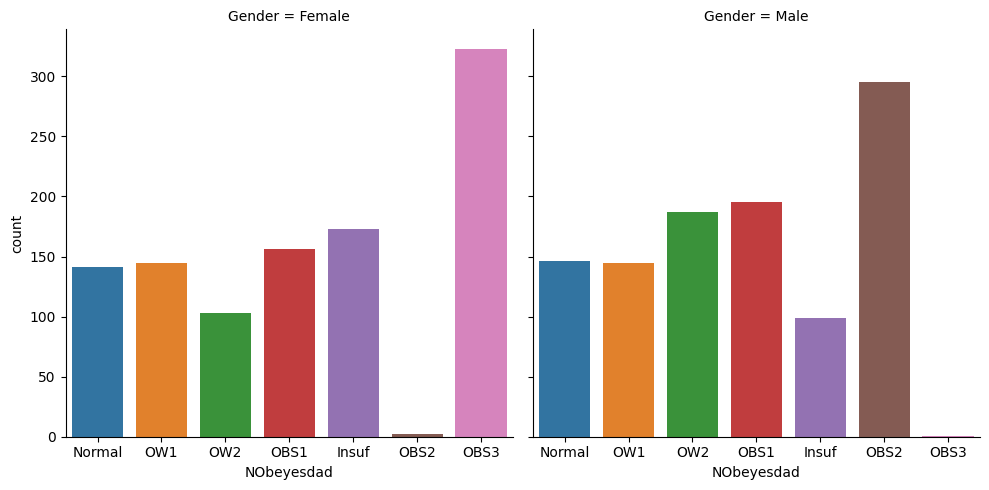

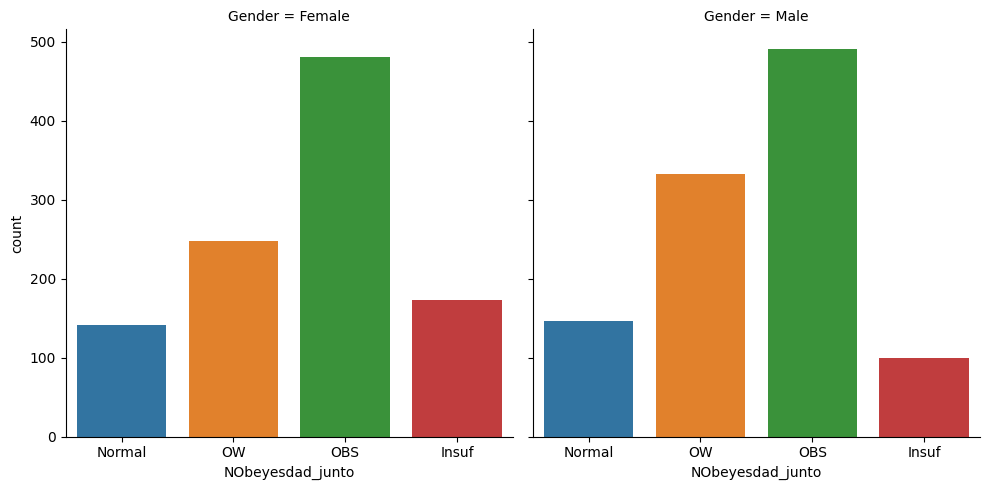

In [ ]:
analise_categoricos(df,'Gender')


In [ ]:
df['Gender'].replace(['Female','Male'],
 [0,1],inplace=True)

yes    1726
no      385
Name: family_history_with_overweight, dtype: int64


NObeyesdad,Insuf,Normal,OBS1,OBS2,OBS3,OW1,OW2
family_history_with_overweight,,,,,,,
no,0.379221,0.342857,0.018182,0.002597,0.000000,0.210390,0.046753
yes,0.073001,0.089803,0.199305,0.171495,0.187717,0.121089,0.157590
All,0.128849,0.135955,0.166272,0.140692,0.153482,0.137376,0.137376


NObeyesdad_junto,Insuf,Normal,OBS,OW
family_history_with_overweight,,,,
no,0.379221,0.342857,0.020779,0.257143
yes,0.073001,0.089803,0.558517,0.278679
All,0.128849,0.135955,0.460445,0.274751


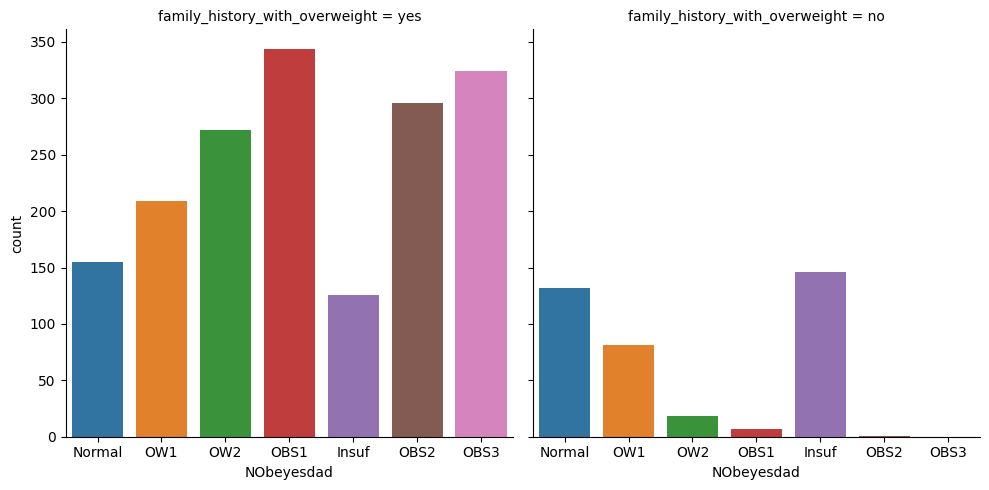

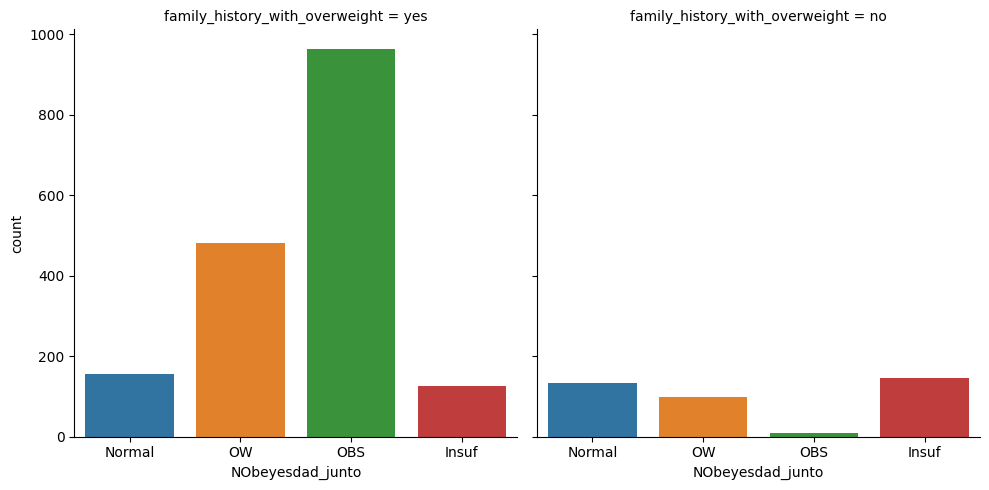

In [ ]:
analise_categoricos(df,'family_history_with_overweight')

In [ ]:
df['family_history_with_overweight'].replace(['no','yes'],
 [0,1],inplace=True)

yes    1866
no      245
Name: FAVC, dtype: int64


NObeyesdad,Insuf,Normal,OBS1,OBS2,OBS3,OW1,OW2
FAVC,,,,,,,
no,0.208163,0.322449,0.044898,0.028571,0.004082,0.089796,0.302041
yes,0.118435,0.111468,0.182208,0.155413,0.173098,0.143623,0.115756
All,0.128849,0.135955,0.166272,0.140692,0.153482,0.137376,0.137376


NObeyesdad_junto,Insuf,Normal,OBS,OW
FAVC,,,,
no,0.208163,0.322449,0.077551,0.391837
yes,0.118435,0.111468,0.510718,0.259378
All,0.128849,0.135955,0.460445,0.274751


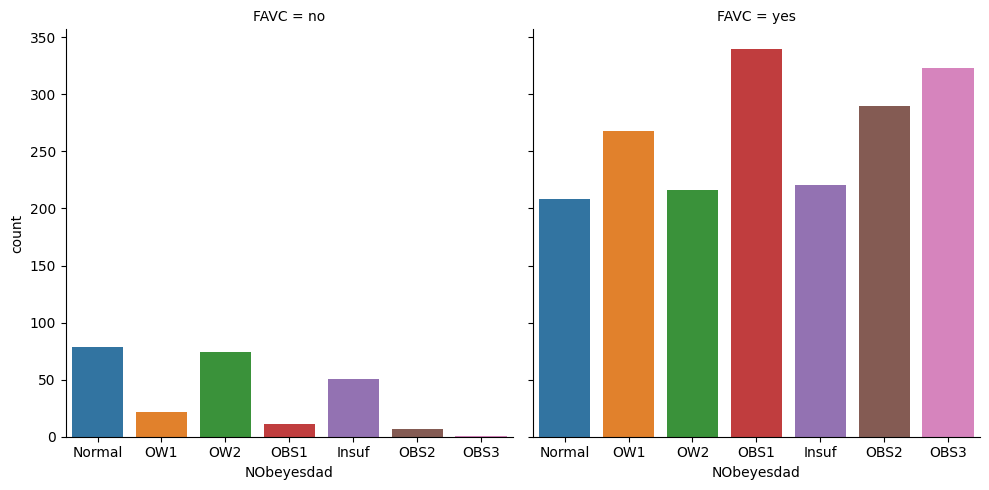

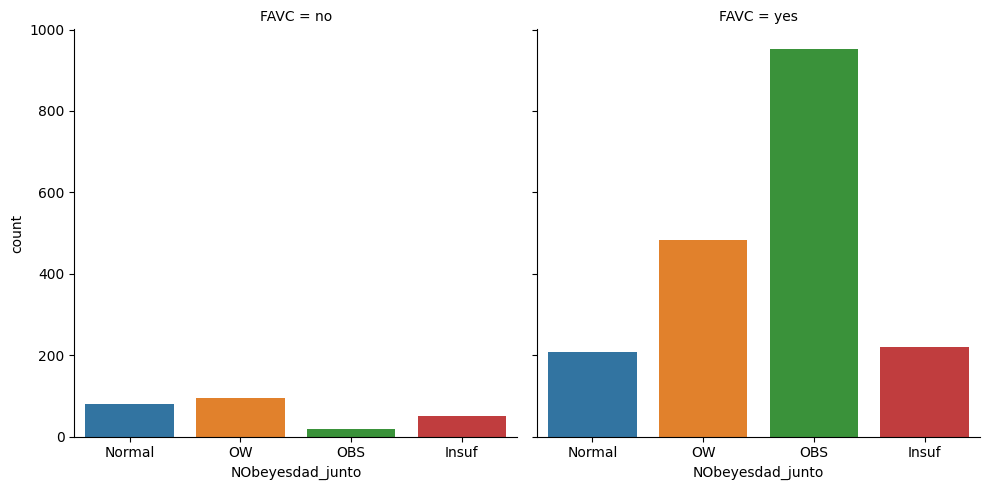

In [ ]:
analise_categoricos(df,'FAVC')

In [ ]:
df['FAVC'].replace(['no','yes'],
 [0,1],inplace=True)

Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64


NObeyesdad,Insuf,Normal,OBS1,OBS2,OBS3,OW1,OW2
CAEC,,,,,,,
Always,0.037736,0.660377,0.113208,0.037736,0.000000,0.094340,0.056604
Frequently,0.500000,0.342975,0.024793,0.004132,0.004132,0.057851,0.066116
Sometimes,0.082720,0.090085,0.191501,0.166006,0.183003,0.133711,0.152975
no,0.058824,0.196078,0.019608,0.019608,0.000000,0.686275,0.019608
All,0.128849,0.135955,0.166272,0.140692,0.153482,0.137376,0.137376


NObeyesdad_junto,Insuf,Normal,OBS,OW
CAEC,,,,
Always,0.037736,0.660377,0.150943,0.150943
Frequently,0.500000,0.342975,0.033058,0.123967
Sometimes,0.082720,0.090085,0.540510,0.286686
no,0.058824,0.196078,0.039216,0.705882
All,0.128849,0.135955,0.460445,0.274751


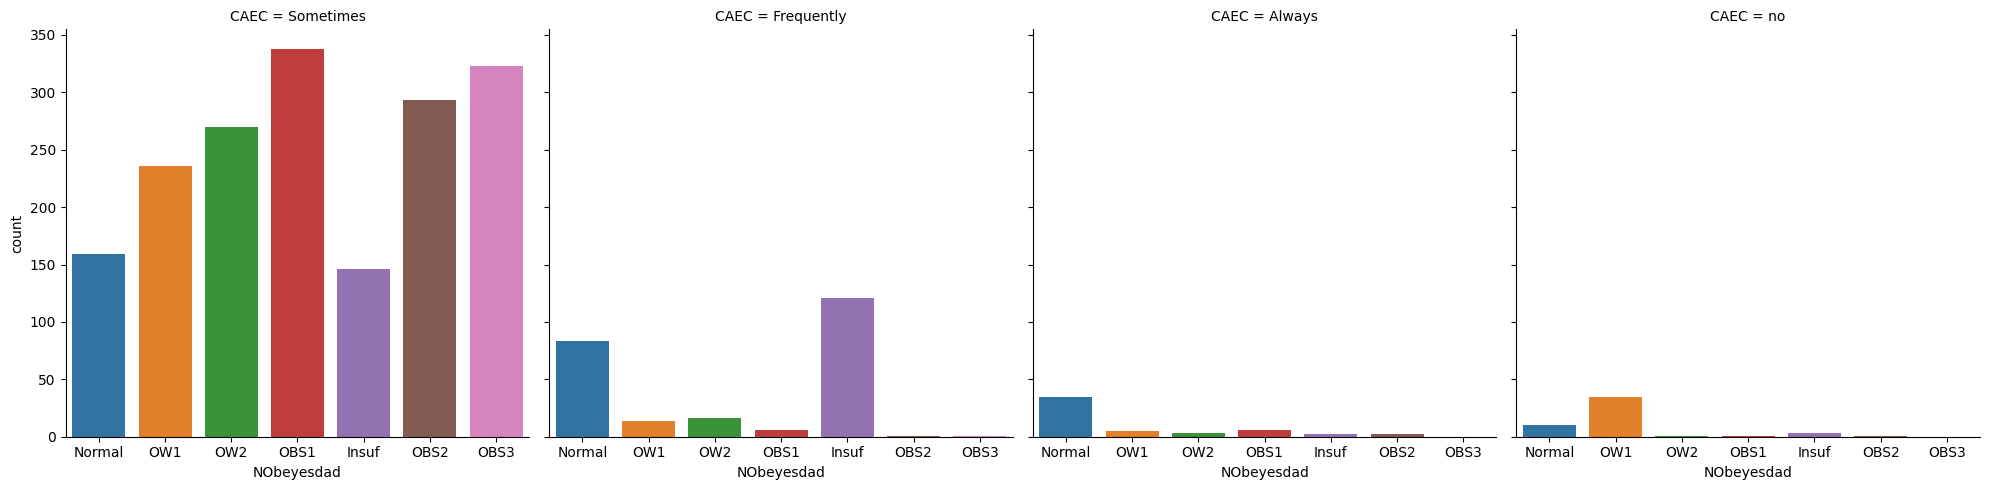

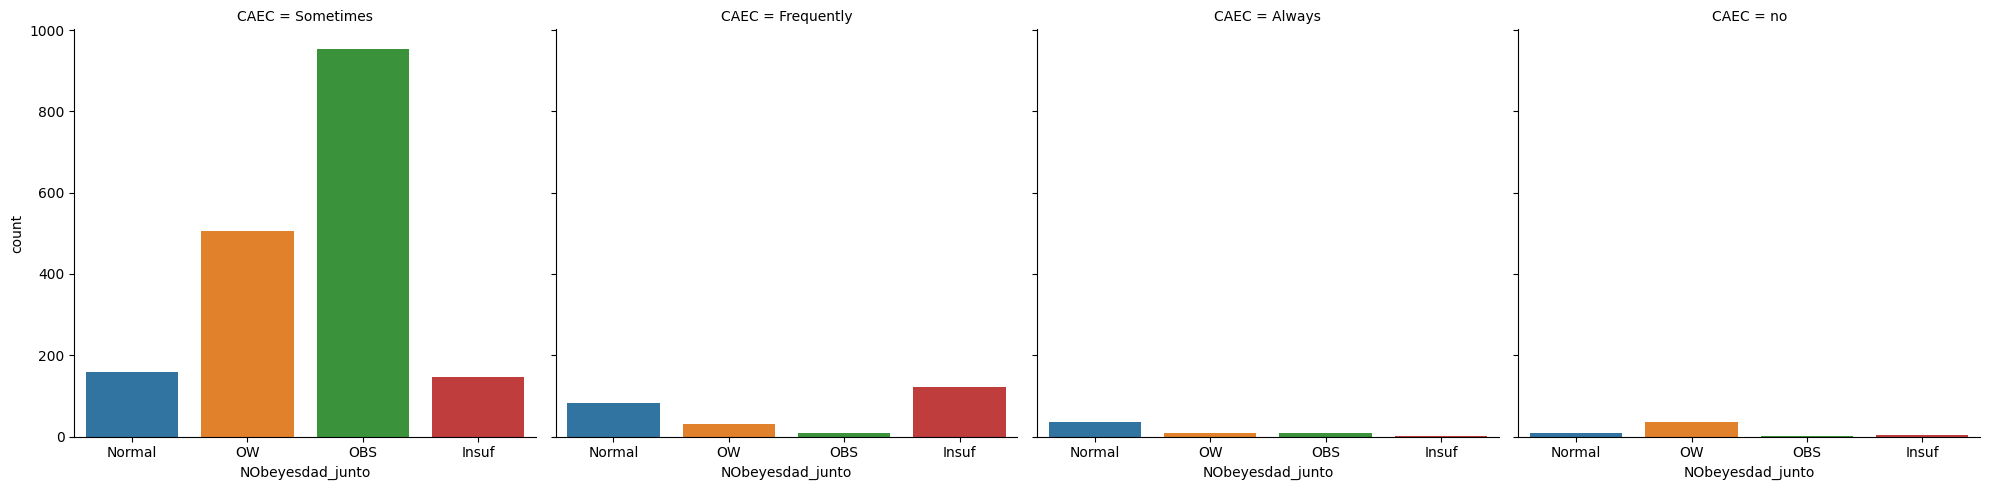

In [ ]:
analise_categoricos(df,'CAEC')

Frequentemente e always são parecidos eambos tem poucos dados. Melhor juntar

Para respostas com valores relativos entre si. Melhor fazer um encode com int em vez de ohc

In [ ]:
df['CAEC'].replace(['no','Sometimes','Frequently','Always'],
 [1,2,3,3],inplace=True)

no     2067
yes      44
Name: SMOKE, dtype: int64


NObeyesdad,Insuf,Normal,OBS1,OBS2,OBS3,OW1,OW2
SMOKE,,,,,,,
no,0.131108,0.132559,0.166909,0.136430,0.156265,0.138849,0.137881
yes,0.022727,0.295455,0.136364,0.340909,0.022727,0.068182,0.113636
All,0.128849,0.135955,0.166272,0.140692,0.153482,0.137376,0.137376


NObeyesdad_junto,Insuf,Normal,OBS,OW
SMOKE,,,,
no,0.131108,0.132559,0.459603,0.276730
yes,0.022727,0.295455,0.500000,0.181818
All,0.128849,0.135955,0.460445,0.274751


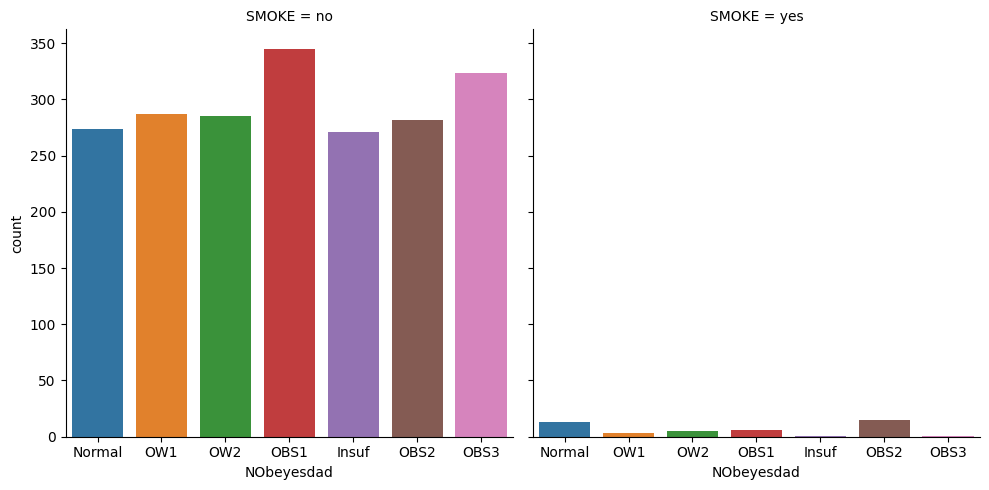

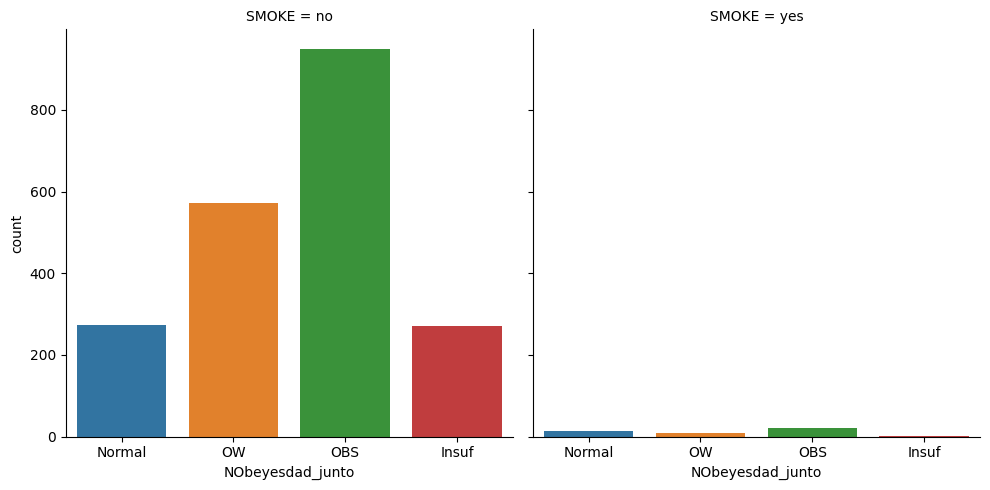

In [ ]:
analise_categoricos(df,'SMOKE')

Smoke tem muitos poucos dados, melhor remover para evitar falhas de generalização

In [ ]:
df.drop('SMOKE',axis=1,inplace=True)

no     2015
yes      96
Name: SCC, dtype: int64


NObeyesdad,Insuf,Normal,OBS1,OBS2,OBS3,OW1,OW2
SCC,,,,,,,
no,0.124069,0.127543,0.173201,0.146898,0.160794,0.125558,0.141935
yes,0.229167,0.312500,0.020833,0.010417,0.000000,0.385417,0.041667
All,0.128849,0.135955,0.166272,0.140692,0.153482,0.137376,0.137376


NObeyesdad_junto,Insuf,Normal,OBS,OW
SCC,,,,
no,0.124069,0.127543,0.480893,0.267494
yes,0.229167,0.312500,0.031250,0.427083
All,0.128849,0.135955,0.460445,0.274751


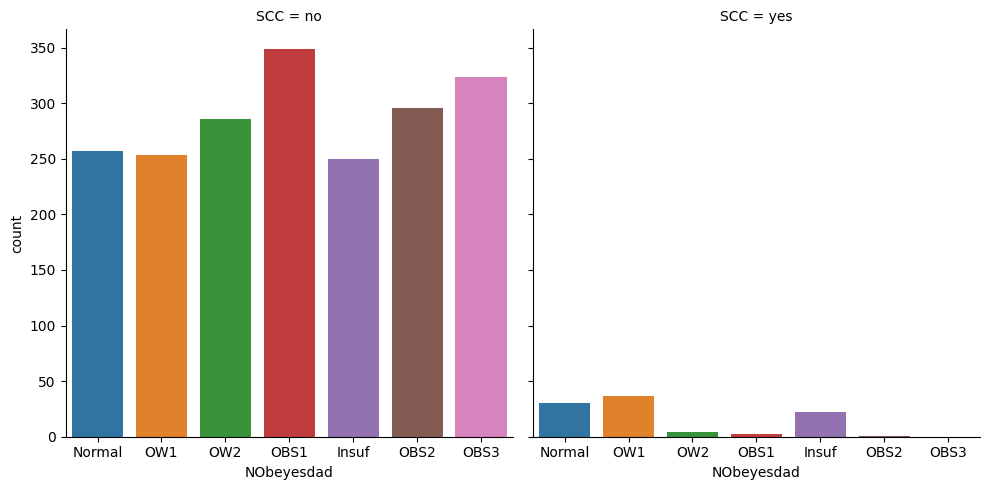

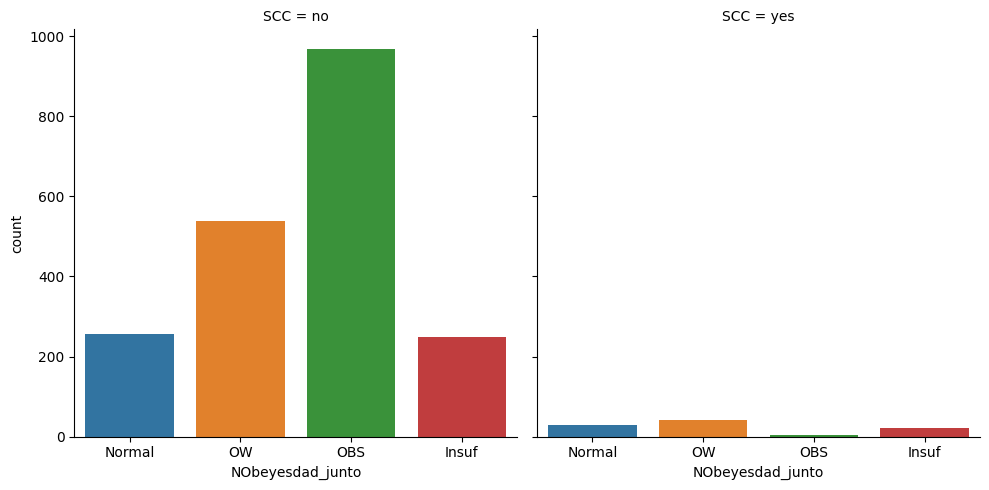

In [ ]:
analise_categoricos(df,'SCC')

In [ ]:
df['SCC'].replace(['no','yes'],
 [0,1],inplace=True)

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64


NObeyesdad,Insuf,Normal,OBS1,OBS2,OBS3,OW1,OW2
CALC,,,,,,,
Always,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Frequently,0.014286,0.257143,0.200000,0.028571,0.000000,0.228571,0.271429
Sometimes,0.109921,0.114918,0.122769,0.159886,0.230550,0.159886,0.102070
no,0.183099,0.167449,0.258216,0.111111,0.001565,0.078247,0.200313
All,0.128849,0.135955,0.166272,0.140692,0.153482,0.137376,0.137376


NObeyesdad_junto,Insuf,Normal,OBS,OW
CALC,,,,
Always,0.000000,1.000000,0.000000,0.000000
Frequently,0.014286,0.257143,0.228571,0.500000
Sometimes,0.109921,0.114918,0.513205,0.261956
no,0.183099,0.167449,0.370892,0.278560
All,0.128849,0.135955,0.460445,0.274751


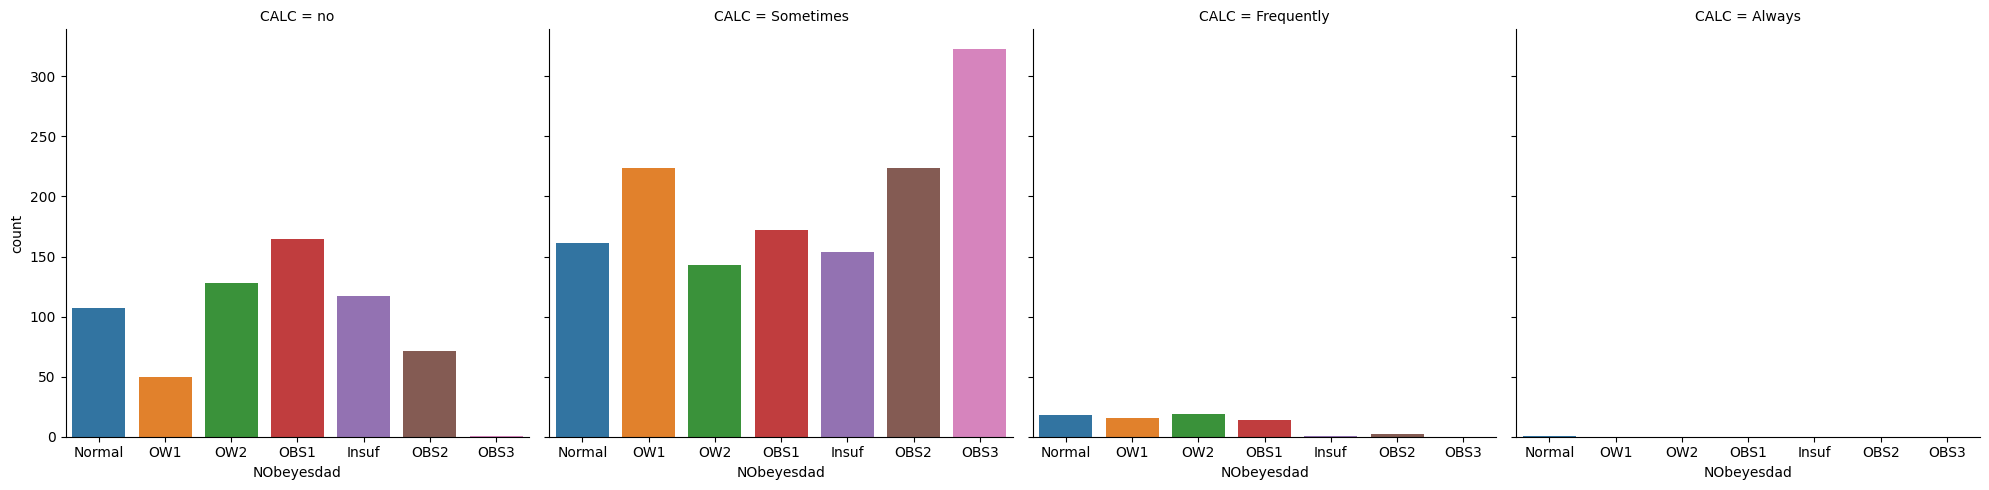

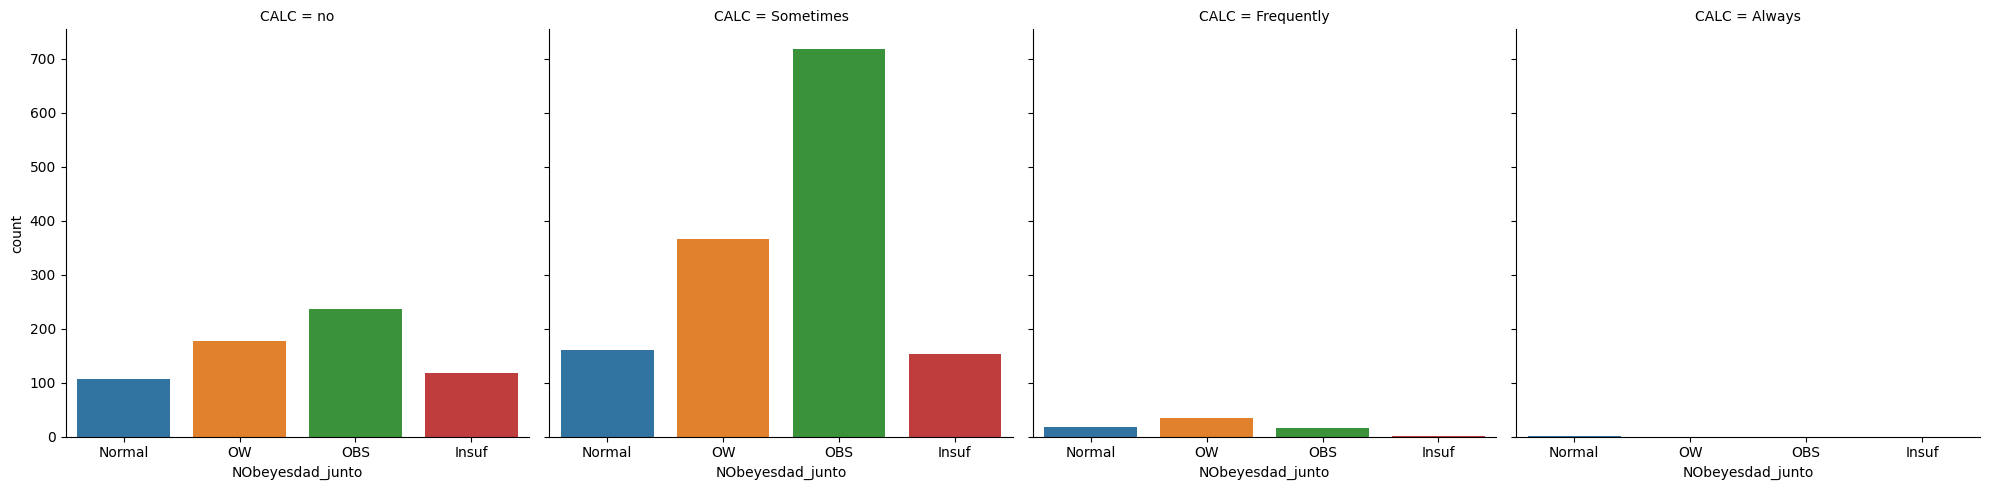

In [ ]:
analise_categoricos(df,'CALC')

Variavel Always só tem 1 dado, juntar com Frequently para evitar falhas de generalização

In [ ]:
df['CALC'].replace(['no','Sometimes','Frequently','Always'],
 [1,2,3,3],inplace=True)

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64


NObeyesdad,Insuf,Normal,OBS1,OBS2,OBS3,OW1,OW2
MTRANS,,,,,,,
Automobile,0.100656,0.098468,0.240700,0.207877,0.002188,0.144420,0.205689
Bike,0.000000,0.571429,0.000000,0.142857,0.000000,0.285714,0.000000
Motorbike,0.000000,0.545455,0.272727,0.000000,0.000000,0.090909,0.090909
Public_Transportation,0.139241,0.126582,0.149367,0.126582,0.204430,0.134177,0.119620
Walking,0.107143,0.571429,0.035714,0.017857,0.000000,0.160714,0.107143
All,0.128849,0.135955,0.166272,0.140692,0.153482,0.137376,0.137376


NObeyesdad_junto,Insuf,Normal,OBS,OW
MTRANS,,,,
Automobile,0.100656,0.098468,0.450766,0.350109
Bike,0.000000,0.571429,0.142857,0.285714
Motorbike,0.000000,0.545455,0.272727,0.181818
Public_Transportation,0.139241,0.126582,0.480380,0.253797
Walking,0.107143,0.571429,0.053571,0.267857
All,0.128849,0.135955,0.460445,0.274751


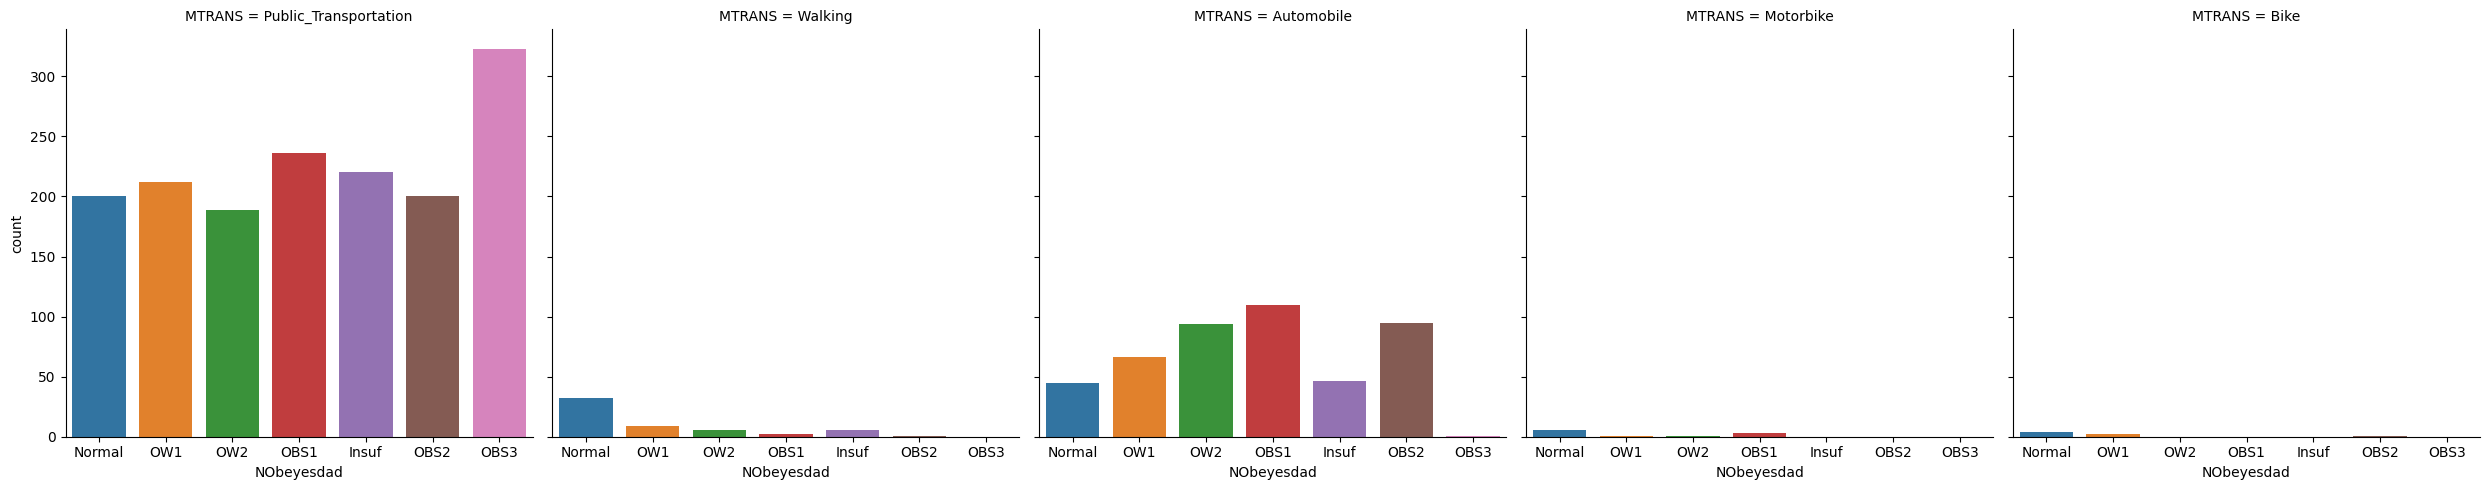

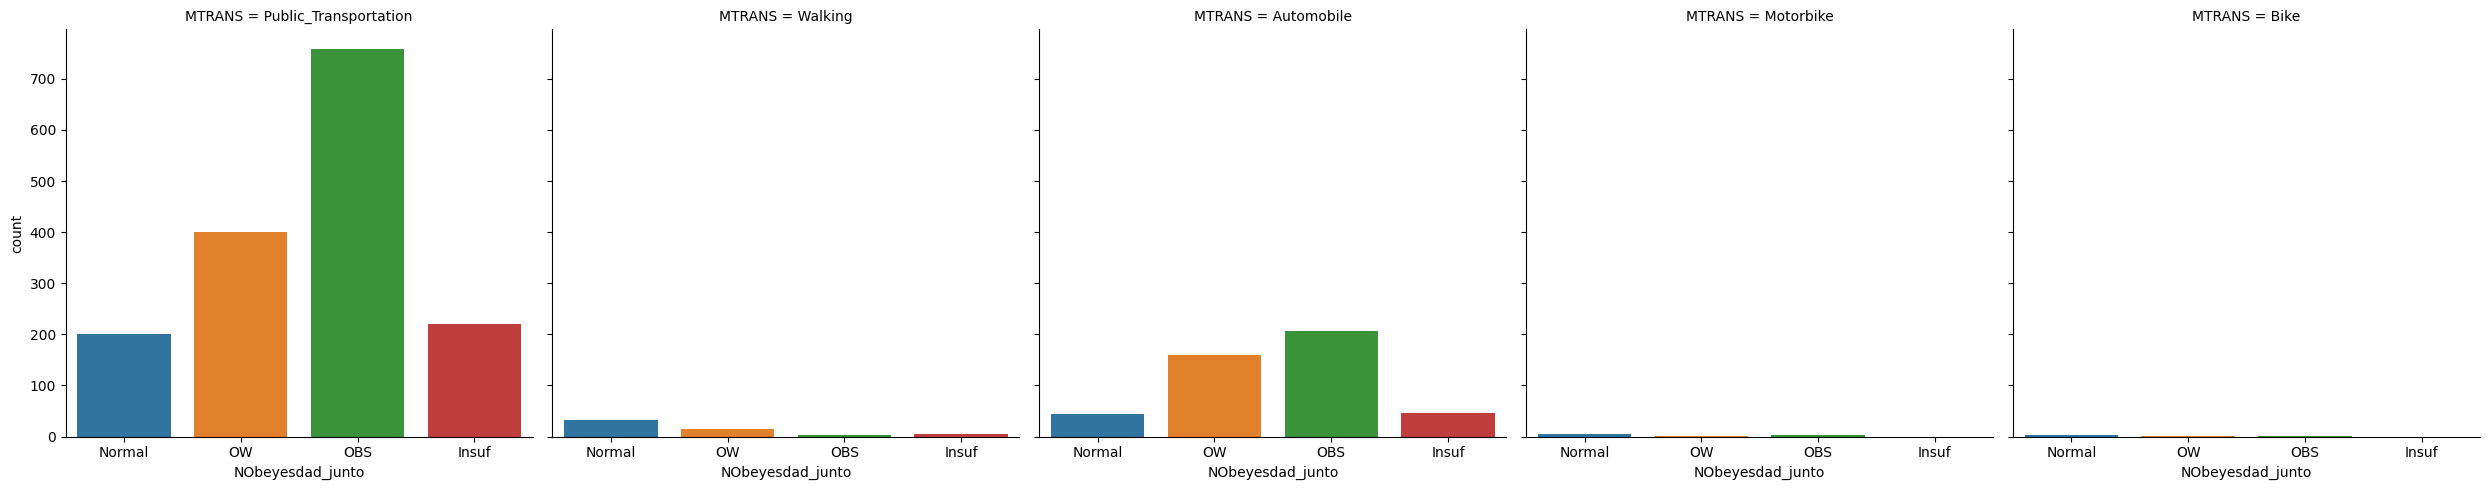

In [ ]:
tab=analise_categoricos(df,'MTRANS')
tab

Dados de Mtrans não tem relação de proximidade entre si, melhor OHC do que discretizar int

Poucos dados em walking + bike e motorbike. Possível
juntarem como 'outros'.

Também é possível juntar motorbike com carro.
Moto+carro= devido ao número muito pequeno de dados de moto irá tender considerar a relação de carro para moto. Passível de gerar erro por isso.

O padrão seria juntar andar+bicicleta+moto como "outros", só que sabemos que moto é bem discrepante dos 2 primeiros em relação a atividade física.

Vamos juntar moto+carro e andar + bicicleta e assumir o
risco de vies menor nessa junção.

Comparação entre automovel e trans publico:
Vemos que trans publico está com mais insuf, normal e obs3
tem consistência com o aumento do peso, exceto em obs3
obs3 originalmente tinha muito poucos dados e ele foi
gerado mais dados através do SMOTE, essa inconsistência
pode ser justificada pelo uso de SMOTE. Se temos poucos
dados sem confiabilidade na distribuição da categoria
SMOTE mantem essa falta de confiabilidade e mascará
o número de amostras.

In [ ]:
df['MTRANS'].replace(['Motorbike','Bike','Walking'],
 ['Automobile','outros','outros'],inplace=True)
df['MTRANS'].value_counts()

Public_Transportation    1580
Automobile                468
outros                     63
Name: MTRANS, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder_background=OneHotEncoder(drop=None)
df.reset_index(drop=True,inplace=True)
temp=pd.DataFrame(encoder_background.fit_transform(df[['MTRANS']]).toarray())
temp=temp.add_prefix('MTRANS_')
df=df.join(temp)
df.drop('MTRANS',axis=1,inplace=True)


In [ ]:
df.dtypes

Gender                              int64
Age                               float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
NObeyesdad                         object
NObeyesdad_junto                   object
MTRANS_0                          float64
MTRANS_1                          float64
MTRANS_2                          float64
dtype: object

In [ ]:
df.describe()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,MTRANS_0,MTRANS_1,MTRANS_2
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,0.817622,0.883941,2.419043,2.685628,2.115585,2.008011,0.045476,1.010298,0.657866,1.730933,0.221696,0.748460,0.029844
std,0.500083,6.345968,0.386247,0.320371,0.533927,0.778039,0.388091,0.612953,0.208395,0.850592,0.608927,0.513869,0.415486,0.434001,0.170196
min,0.000000,14.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.000000,1.000000,2.000000,2.658738,2.000000,1.584812,0.000000,0.124505,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,22.777890,1.000000,1.000000,2.385502,3.000000,2.000000,2.000000,0.000000,1.000000,0.625350,2.000000,0.000000,1.000000,0.000000
75%,1.000000,26.000000,1.000000,1.000000,3.000000,3.000000,2.000000,2.477420,0.000000,1.666678,1.000000,2.000000,0.000000,1.000000,0.000000
max,1.000000,61.000000,1.000000,1.000000,3.000000,4.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000


Analise numerico
Devido a utilização do smote pós-conversão númerica alguns valores numericos que deveriam ser discretizados viraram continuos devemos consertar


In [ ]:
df['Age']=round(df['Age']).astype('int')
df['FCVC']=round(df['FCVC']).astype('int')
df['NCP']=round(df['NCP']).astype('int')
df['CH2O']=round(df['CH2O']).astype('int')
df['FAF']=round(df['FAF']).astype('int')
df['TUE']=round(df['TUE']).astype('int')

FCVC, NCP,CH20,FAF,TUE na verdade são categoricos
discretizados

In [ ]:
df.describe()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,MTRANS_0,MTRANS_1,MTRANS_2
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.315964,0.817622,0.883941,2.423496,2.687826,2.115585,2.014685,0.045476,1.006632,0.664614,1.730933,0.221696,0.748460,0.029844
std,0.500083,6.357078,0.386247,0.320371,0.583905,0.809680,0.388091,0.688616,0.208395,0.895462,0.674009,0.513869,0.415486,0.434001,0.170196
min,0.000000,14.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,23.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000
75%,1.000000,26.000000,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,0.000000,1.000000,0.000000
max,1.000000,61.000000,1.000000,1.000000,3.000000,4.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000


count    2111.000000
mean       24.315964
std         6.357078
min        14.000000
25%        20.000000
50%        23.000000
75%        26.000000
max        61.000000
Name: Age, dtype: float64
21    236
23    218
26    213
18    212
19    169
22    163
20    150
24     95
25     82
17     69
31     62
30     53
27     43
33     37
38     34
29     33
34     29
32     26
39     25
37     24
41     20
28     20
16     20
35     19
40     19
44      6
36      6
42      6
55      5
45      3
43      3
46      2
51      2
48      1
61      1
14      1
56      1
15      1
52      1
47      1
Name: Age, dtype: int64
Axes(0.125,0.11;0.775x0.77)


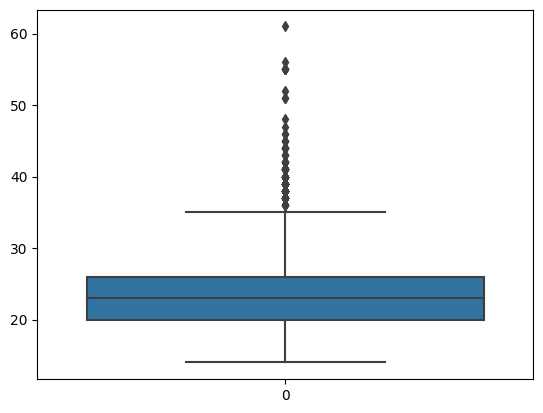

In [ ]:
analise_num(df,col_num[0])

<Axes: xlabel='Age', ylabel='Count'>

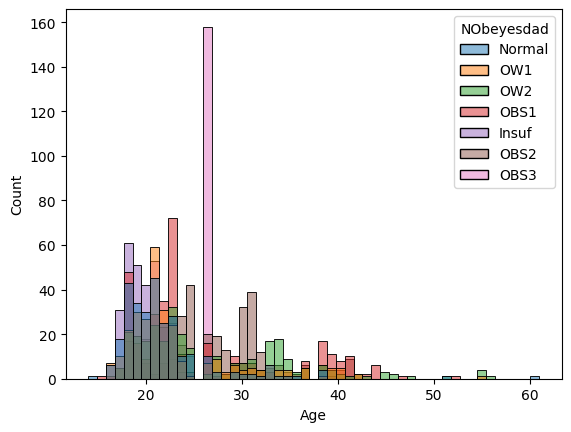

In [ ]:
sns.histplot(data=df, x='Age',hue='NObeyesdad')

<Axes: xlabel='Age', ylabel='Count'>

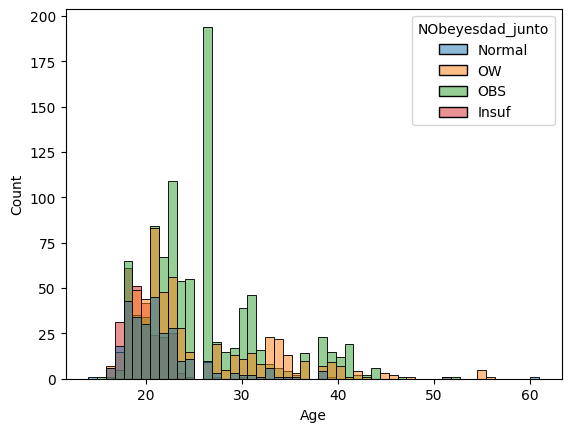

In [ ]:
sns.histplot(data=df, x='Age',hue='NObeyesdad_junto')

count    2097.000000
mean       24.128755
std         5.939149
min        14.000000
25%        20.000000
50%        23.000000
75%        26.000000
max        45.000000
Name: Age, dtype: float64
21    236
23    218
26    213
18    212
19    169
22    163
20    150
24     95
25     82
17     69
31     62
30     53
27     43
33     37
38     34
29     33
34     29
32     26
39     25
37     24
28     20
41     20
16     20
35     19
40     19
42      6
44      6
36      6
45      3
43      3
14      1
15      1
Name: Age, dtype: int64
Axes(0.125,0.11;0.775x0.77)


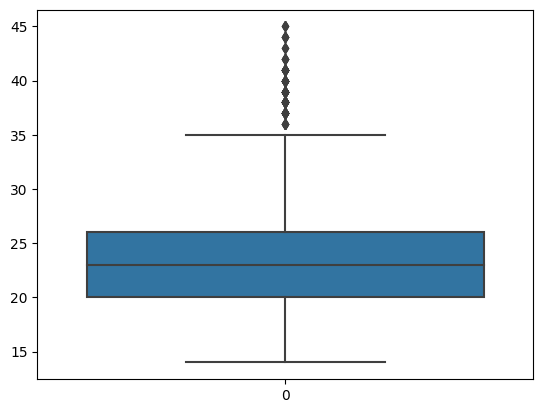

In [ ]:
df=df.loc[df['Age']<=45]
analise_num(df,col_num[0])

2    1004
3     991
1     102
Name: FCVC, dtype: int64


NObeyesdad,Insuf,Normal,OBS1,OBS2,OBS3,OW1,OW2
FCVC,,,,,,,
1,0.225490,0.176471,0.166667,0.205882,0.000000,0.137255,0.088235
2,0.085657,0.154382,0.253984,0.137450,0.000000,0.185259,0.183267
3,0.164480,0.113017,0.077699,0.139253,0.326942,0.089808,0.088799
All,0.129709,0.135908,0.166428,0.141631,0.154506,0.137816,0.134001


NObeyesdad_junto,Insuf,Normal,OBS,OW
FCVC,,,,
1,0.225490,0.176471,0.372549,0.225490
2,0.085657,0.154382,0.391434,0.368526
3,0.164480,0.113017,0.543895,0.178607
All,0.129709,0.135908,0.462566,0.271817


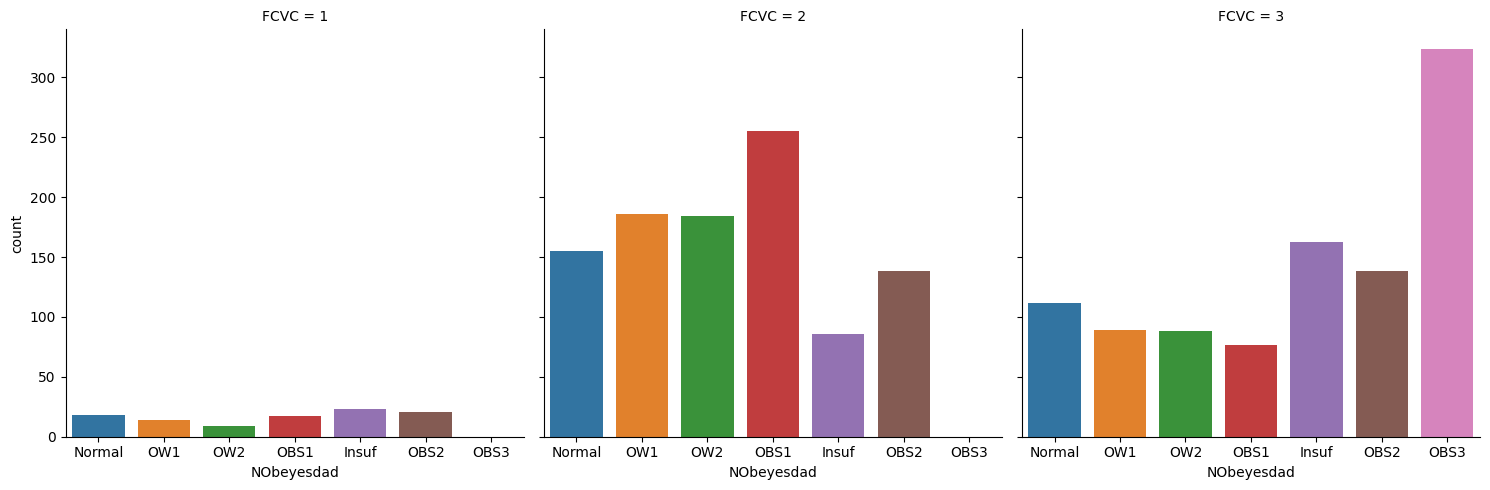

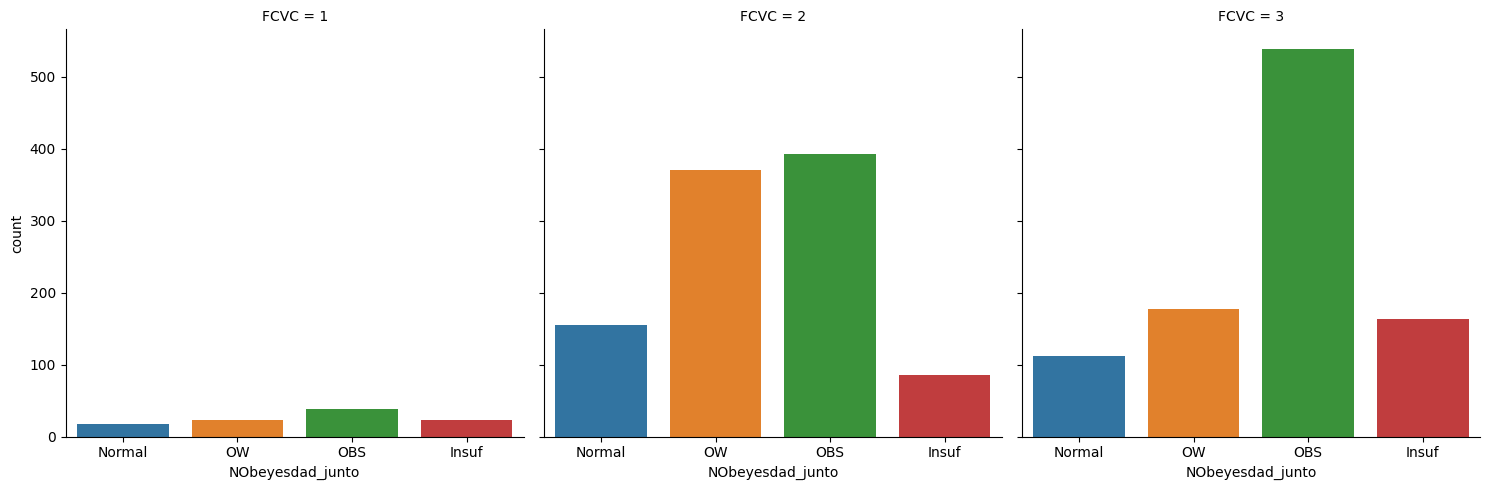

In [ ]:
analise_categoricos(df,col_num[1])

O dado FCVC está estranho para OBS3 100% deles tem essa medida. Pode estar atrelado ao uso do SMOTE em uma quantia muito pequena de dados dessa classe.


3    1459
1     314
2     176
4     148
Name: NCP, dtype: int64


NObeyesdad,Insuf,Normal,OBS1,OBS2,OBS3,OW1,OW2
NCP,,,,,,,
1,0.117834,0.165605,0.245223,0.076433,0.000000,0.242038,0.152866
2,0.102273,0.000000,0.267045,0.204545,0.000000,0.130682,0.295455
3,0.099383,0.139822,0.154215,0.156271,0.222070,0.108293,0.119945
4,0.486486,0.195946,0.000000,0.060811,0.000000,0.216216,0.040541
All,0.129709,0.135908,0.166428,0.141631,0.154506,0.137816,0.134001


NObeyesdad_junto,Insuf,Normal,OBS,OW
NCP,,,,
1,0.117834,0.165605,0.321656,0.394904
2,0.102273,0.000000,0.471591,0.426136
3,0.099383,0.139822,0.532557,0.228239
4,0.486486,0.195946,0.060811,0.256757
All,0.129709,0.135908,0.462566,0.271817


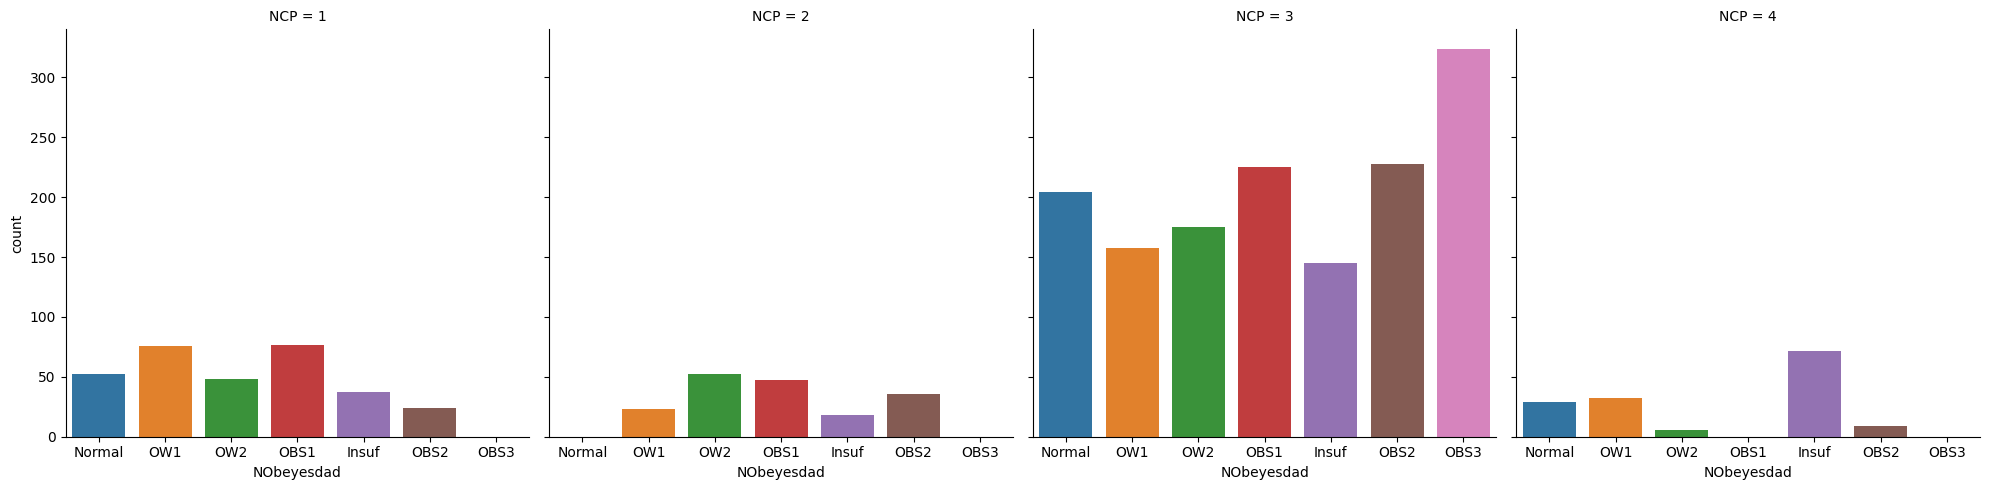

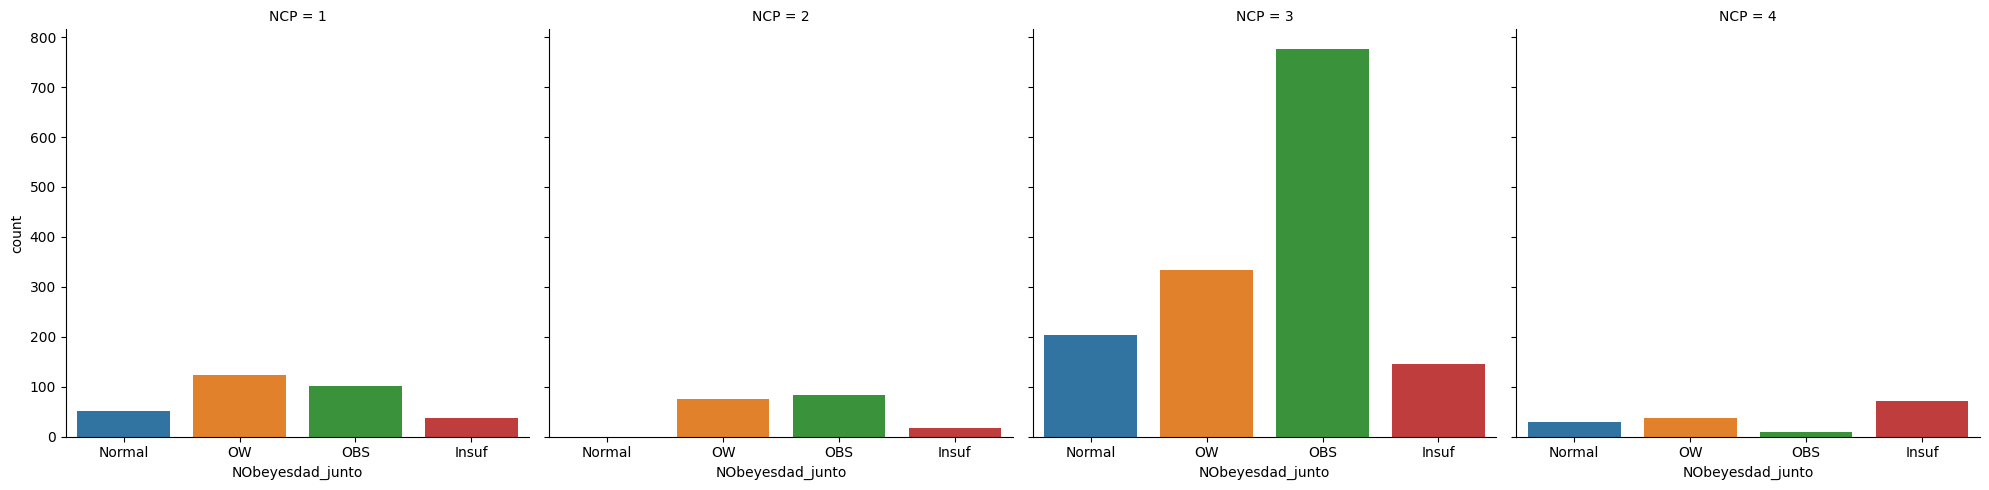

In [ ]:
analise_categoricos(df,col_num[2])

2    1100
3     514
1     483
Name: CH2O, dtype: int64


NObeyesdad,Insuf,Normal,OBS1,OBS2,OBS3,OW1,OW2
CH2O,,,,,,,
1,0.173913,0.171843,0.140787,0.169772,0.126294,0.124224,0.093168
2,0.129091,0.148182,0.155455,0.160909,0.103636,0.140000,0.162727
3,0.089494,0.075875,0.214008,0.073930,0.289883,0.145914,0.110895
All,0.129709,0.135908,0.166428,0.141631,0.154506,0.137816,0.134001


NObeyesdad_junto,Insuf,Normal,OBS,OW
CH2O,,,,
1,0.173913,0.171843,0.436853,0.217391
2,0.129091,0.148182,0.420000,0.302727
3,0.089494,0.075875,0.577821,0.256809
All,0.129709,0.135908,0.462566,0.271817


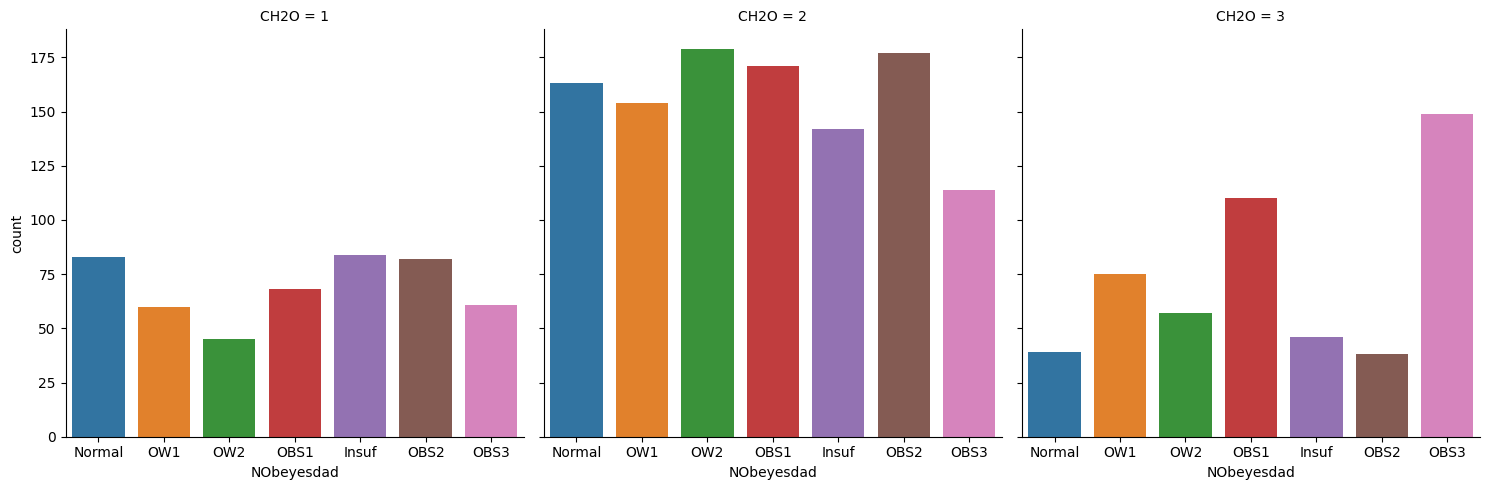

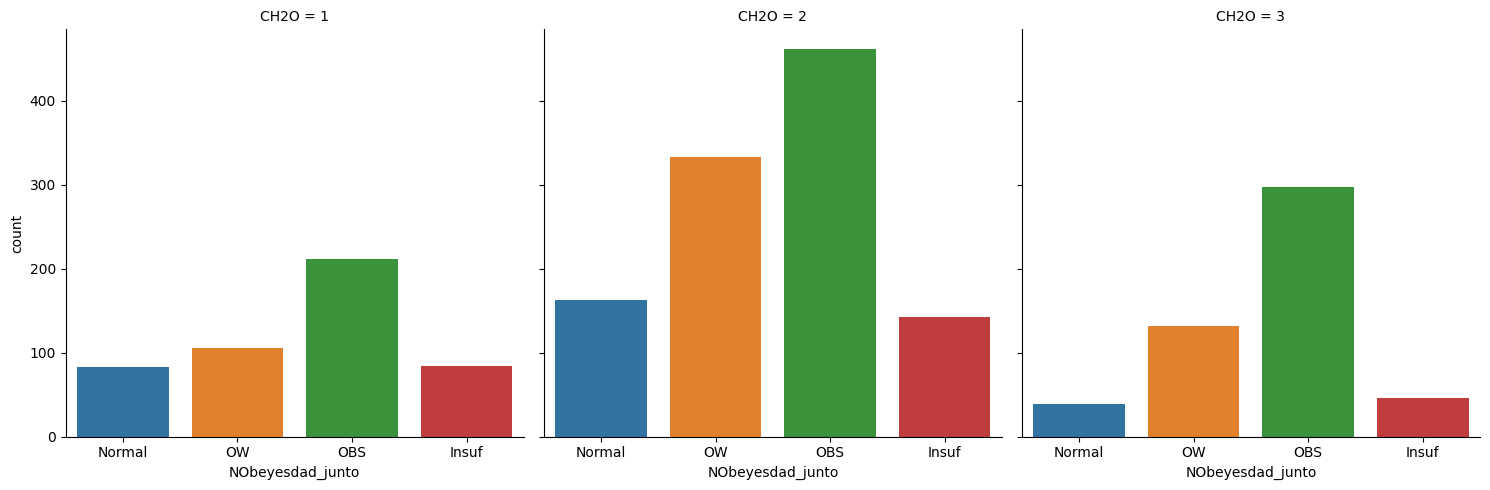

In [ ]:
analise_categoricos(df,col_num[3])

1    767
0    717
2    495
3    118
Name: FAF, dtype: int64


NObeyesdad,Insuf,Normal,OBS1,OBS2,OBS3,OW1,OW2
FAF,,,,,,,
0,0.100418,0.111576,0.179916,0.096234,0.260809,0.117155,0.133891
1,0.093872,0.125163,0.160365,0.215124,0.088657,0.164276,0.152542
2,0.236364,0.137374,0.145455,0.127273,0.139394,0.113131,0.101010
3,0.093220,0.347458,0.211864,0.000000,0.000000,0.194915,0.152542
All,0.129709,0.135908,0.166428,0.141631,0.154506,0.137816,0.134001


NObeyesdad_junto,Insuf,Normal,OBS,OW
FAF,,,,
0,0.100418,0.111576,0.536960,0.251046
1,0.093872,0.125163,0.464146,0.316819
2,0.236364,0.137374,0.412121,0.214141
3,0.093220,0.347458,0.211864,0.347458
All,0.129709,0.135908,0.462566,0.271817


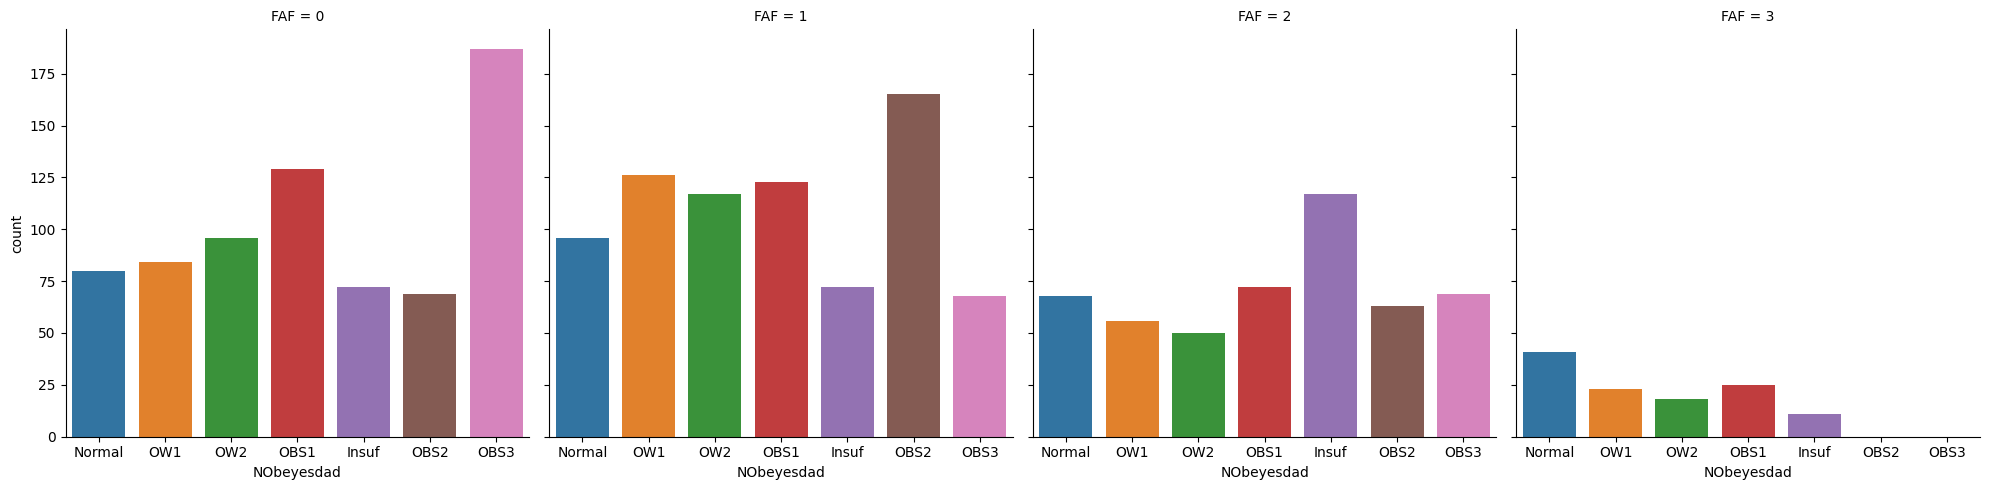

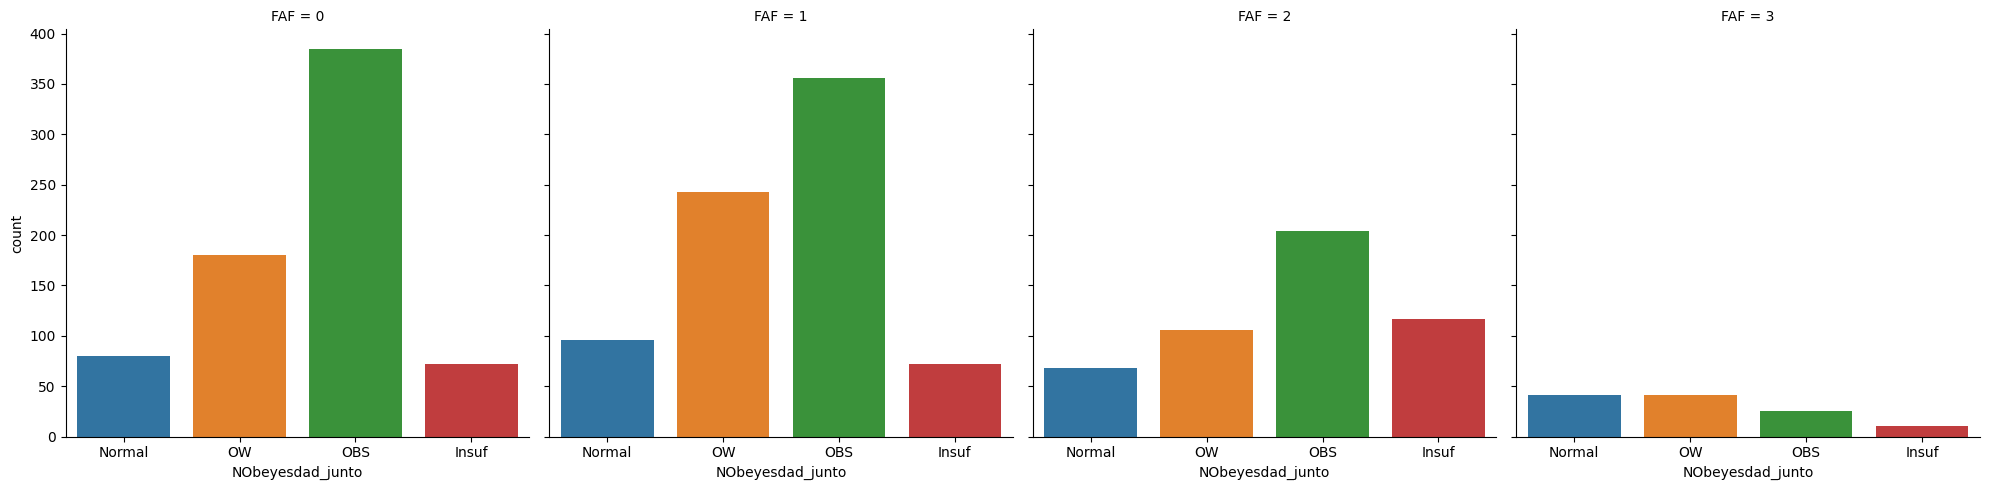

In [ ]:
analise_categoricos(df,col_num[4])

0    939
1    914
2    244
Name: TUE, dtype: int64


NObeyesdad,Insuf,Normal,OBS1,OBS2,OBS3,OW1,OW2
TUE,,,,,,,
0,0.100106,0.136315,0.177849,0.184239,0.116081,0.173589,0.111821
1,0.138950,0.132385,0.132385,0.112691,0.235230,0.089716,0.158643
2,0.209016,0.147541,0.250000,0.086066,0.000000,0.180328,0.127049
All,0.129709,0.135908,0.166428,0.141631,0.154506,0.137816,0.134001


NObeyesdad_junto,Insuf,Normal,OBS,OW
TUE,,,,
0,0.100106,0.136315,0.478168,0.285410
1,0.138950,0.132385,0.480306,0.248359
2,0.209016,0.147541,0.336066,0.307377
All,0.129709,0.135908,0.462566,0.271817


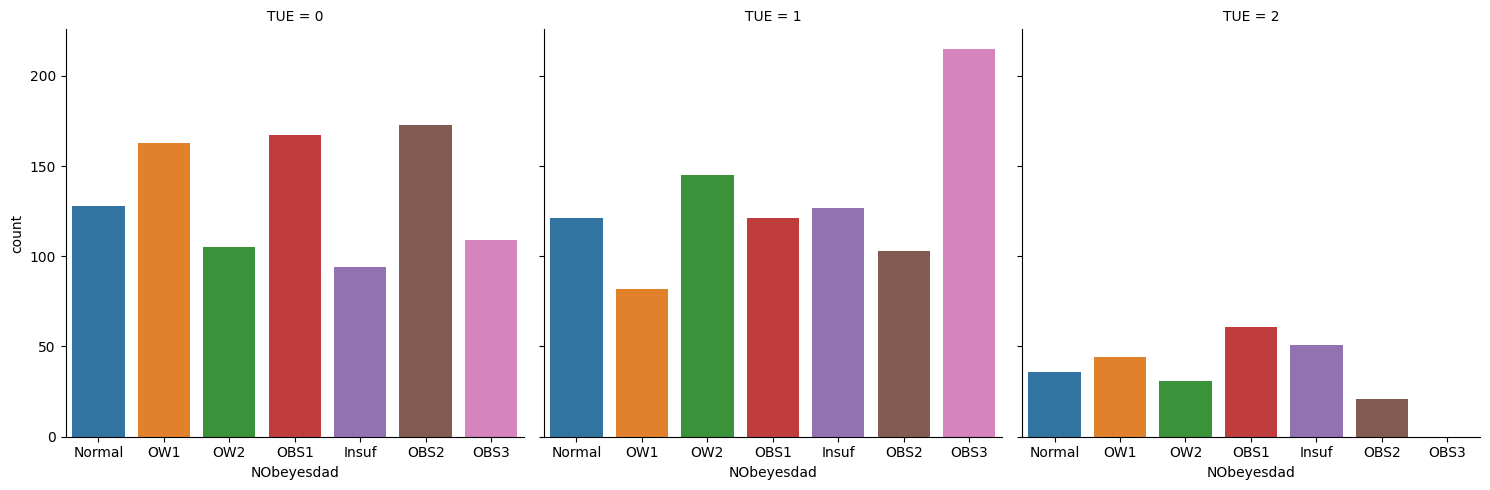

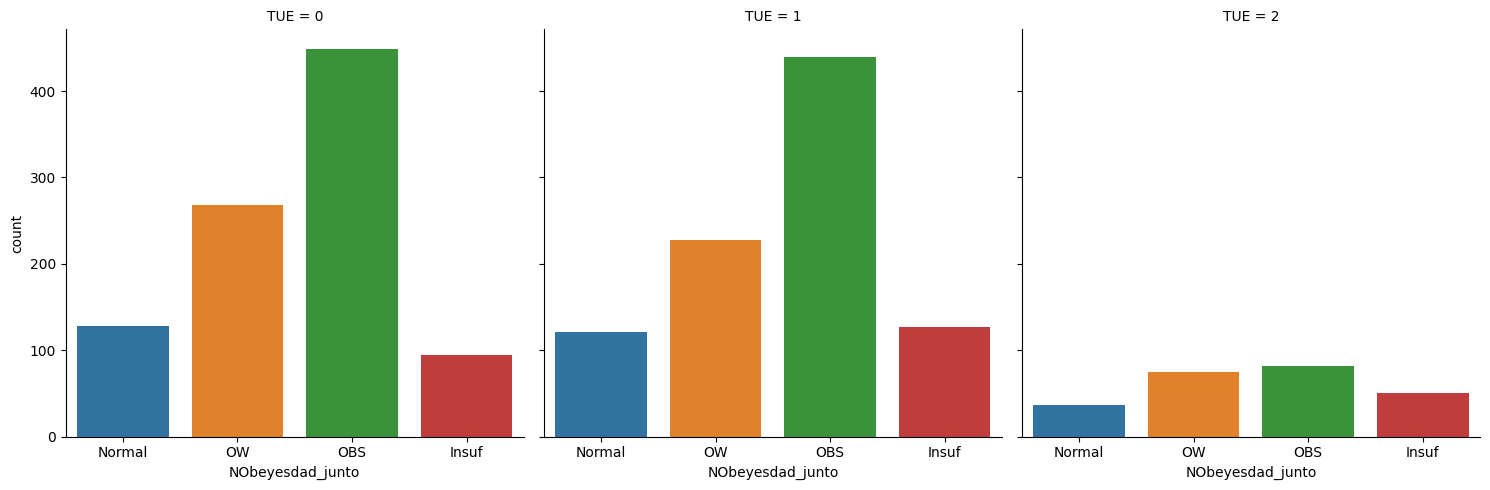

In [ ]:
analise_categoricos(df,col_num[5])

<ipython-input-42-bb1b1b5e659d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),mask= np.triu(df.corr()),annot = True,


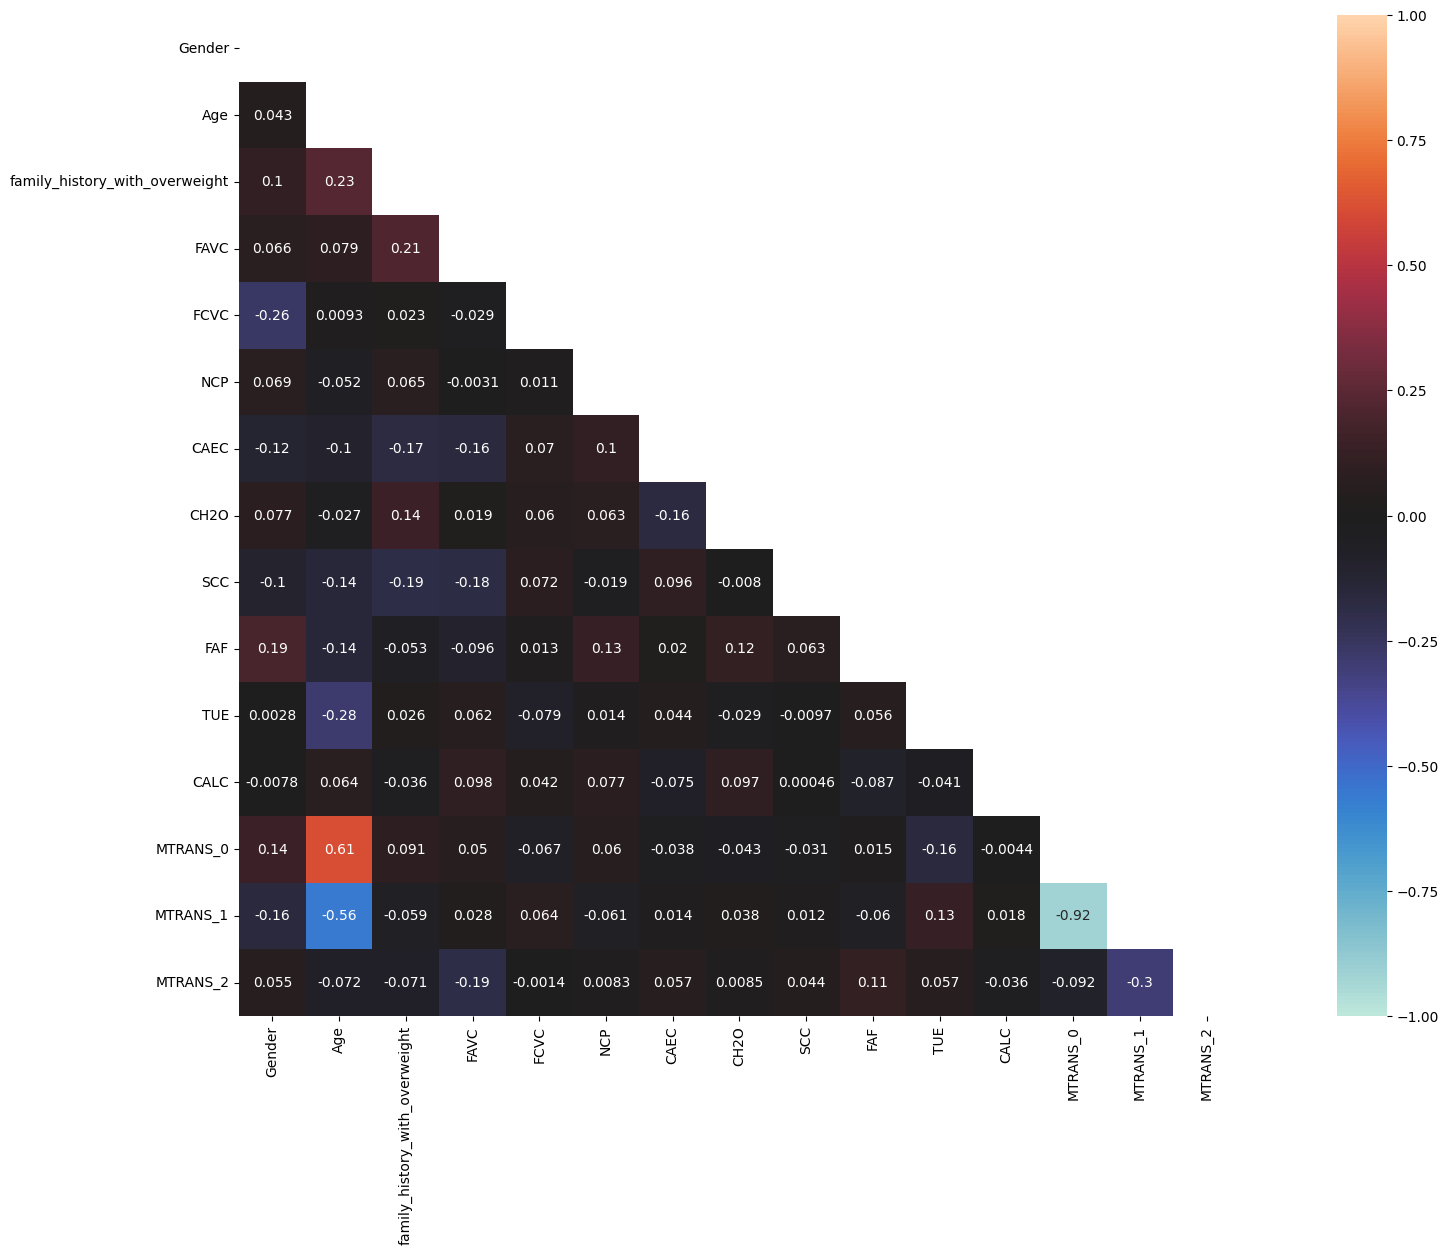

In [ ]:
plt.figure(figsize=(25,13))
sns.heatmap(df.corr(),mask= np.triu(df.corr()),annot = True,
          vmin=-1, vmax=1, center= 0,square="True")
plt.show()

MTRANS0 e MTRANS1 apareceram com alta correlação, porque
existem muitos poucos dados com MTRANS2

Age e MTRANS apareceram com correlação alta, mas a principio
é interessante manter informações de ambos atributos

In [ ]:
df_orig=df.copy()

In [ ]:
df=df_orig.copy()

Predições


In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=35,stratify=df['NObeyesdad'])
df_train.reset_index(drop=True,inplace = True)
df_test.reset_index(drop=True,inplace=True)

X_train=df_train.drop(['NObeyesdad','NObeyesdad_junto'],axis=1)
y_train=df_train['NObeyesdad']
X_test=df_test.drop(['NObeyesdad','NObeyesdad_junto'],axis=1)
y_test=df_test['NObeyesdad']

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

y_train_xgb=y_train.replace(['OBS1','OBS2','OBS3','OW1','OW2','Normal','Insuf'],
                            [0,1,2,3,4,5,6]
                            ,inplace=False)
y_test_xgb=y_test.replace(['OBS1','OBS2','OBS3','OW1','OW2','Normal','Insuf'],
                            [0,1,2,3,4,5,6]
                            ,inplace=False)

In [ ]:
def grid_hyper(clf,X_train,y_train,X_test,y_test, parameters):
    search = GridSearchCV(clf, parameters,verbose=True, n_jobs=-1, cv=10)
    search.fit(X_train,y_train)
    y_hat = search.predict(X_test)
    print ("Accuracy Score = %3.2f" %(search.score(X_test,y_test)))
    print (search.best_params_)


Random Forest (Modelo base)

RF é um bom modelo base pois funciona bem sem muita calibração nos hiperparametros

In [ ]:
rf_clf=RandomForestClassifier(n_estimators=250)
rf_clf.fit(X_train,y_train)
yhat=rf_clf.predict(X_test)
print('Teste de acuracia: ',accuracy_score(y_test,yhat))
print('Confusion_matrix :\n',confusion_matrix(y_test,yhat),'\n')
print('Classification report:\n',metrics.classification_report(y_test, yhat))

Teste de acuracia:  0.7928571428571428
Confusion_matrix :
 [[50  3  0  0  0  0  1]
 [11 34  3  2  1  5  1]
 [ 1  6 56  2  0  2  3]
 [ 0  0  1 54  0  0  5]
 [ 0  1  0  0 64  0  0]
 [ 2 10  5  1  0 37  3]
 [ 2  7  2  6  0  1 38]] 

Classification report:
               precision    recall  f1-score   support

       Insuf       0.76      0.93      0.83        54
      Normal       0.56      0.60      0.58        57
        OBS1       0.84      0.80      0.82        70
        OBS2       0.83      0.90      0.86        60
        OBS3       0.98      0.98      0.98        65
         OW1       0.82      0.64      0.72        58
         OW2       0.75      0.68      0.71        56

    accuracy                           0.79       420
   macro avg       0.79      0.79      0.79       420
weighted avg       0.80      0.79      0.79       420



In [ ]:
n_estimators = [int(x) for x in range(50, 300,50)]
criterion = ['gini','entropy']
max_features = ['sqrt']  #, 'log2'] poucos atributos, melhor agilizar só com sqrt
max_depth = [int(x) for x in range(10, 60, 10)]

#já tem relação com depth, melhor agilizar a busca.
#min_samples_split = [int(x) for x in range(2, 6)]
#já tem relação com depth, melhor agilizar a busca
#min_samples_leaf = [int(x) for x in range(1, 5)]


parameters = { 'criterion':criterion,
               'n_estimators': n_estimators,
              'max_depth':max_depth,
              'max_features':max_features
               # 'min_samples_split':min_samples_split
               }


grid_hyper(RandomForestClassifier(),X_train,y_train,X_test,y_test,parameters)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Accuracy Score = 0.79
{'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 250}


In [ ]:
rf_clf=RandomForestClassifier(criterion='gini', max_depth=50, max_features='sqrt', n_estimators=150)
rf_clf.fit(X_train,y_train)
yhat=rf_clf.predict(X_test)
print('Teste de acuracia: ',accuracy_score(y_test,yhat))
print('Confusion_matrix :\n',confusion_matrix(y_test,yhat),'\n')
print('Classification report:\n',metrics.classification_report(y_test, yhat))

Teste de acuracia:  0.7976190476190477
Confusion_matrix :
 [[50  3  0  0  0  0  1]
 [ 8 37  3  2  1  5  1]
 [ 1  6 57  2  0  1  3]
 [ 0  1  1 53  0  0  5]
 [ 0  1  0  0 64  0  0]
 [ 1 12  5  1  0 36  3]
 [ 2  7  2  6  0  1 38]] 

Classification report:
               precision    recall  f1-score   support

       Insuf       0.81      0.93      0.86        54
      Normal       0.55      0.65      0.60        57
        OBS1       0.84      0.81      0.83        70
        OBS2       0.83      0.88      0.85        60
        OBS3       0.98      0.98      0.98        65
         OW1       0.84      0.62      0.71        58
         OW2       0.75      0.68      0.71        56

    accuracy                           0.80       420
   macro avg       0.80      0.79      0.79       420
weighted avg       0.80      0.80      0.80       420



XGBoost
 é um bom modelo para lidar com dados tabulares

In [ ]:
xgb_clf=XGBClassifier(n_estimators=250)
xgb_clf.fit(X_train,y_train_xgb)
yhat=xgb_clf.predict(X_test)
print('Teste de acuracia: ',accuracy_score(y_test_xgb,yhat))
print('Confusion_matrix :\n',confusion_matrix(y_test_xgb,yhat),'\n')
print('Classification report:\n',metrics.classification_report(y_test_xgb, yhat))

Teste de acuracia:  0.7833333333333333
Confusion_matrix :
 [[56  3  0  2  5  3  1]
 [ 2 52  0  0  5  0  1]
 [ 0  0 64  0  0  1  0]
 [ 7  1  1 40  2  6  1]
 [ 2  5  0  1 37 10  1]
 [ 5  2  0  7  1 30 12]
 [ 0  0  0  0  1  3 50]] 

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79        70
           1       0.83      0.87      0.85        60
           2       0.98      0.98      0.98        65
           3       0.80      0.69      0.74        58
           4       0.73      0.66      0.69        56
           5       0.57      0.53      0.55        57
           6       0.76      0.93      0.83        54

    accuracy                           0.78       420
   macro avg       0.78      0.78      0.78       420
weighted avg       0.78      0.78      0.78       420



In [ ]:
n_estimators = [int(x) for x in range(100, 300,50)]
#cortado para agilizar max_depth = [3,5,6,10]
#cortado para agilizar booster=['gbtree','dart']

parameters = {
               'n_estimators': n_estimators,
              #'max_depth':max_depth,
              # 'booster':booster
               }
grid_hyper(XGBClassifier(),X_train,y_train_xgb,X_test,y_test_xgb,parameters)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Accuracy Score = 0.78
{'n_estimators': 100}
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 7.63 µs


In [ ]:
xgb_clf=XGBClassifier(n_estimators=100)
xgb_clf.fit(X_train,y_train_xgb)
yhat=xgb_clf.predict(X_test)
print('Teste de acuracia: ',accuracy_score(y_test_xgb,yhat))
print('Confusion_matrix :\n',confusion_matrix(y_test_xgb,yhat),'\n')
print('Classification report:\n',metrics.classification_report(y_test_xgb, yhat))

Teste de acuracia:  0.7833333333333333
Confusion_matrix :
 [[56  3  0  2  5  4  0]
 [ 1 54  0  0  4  0  1]
 [ 0  0 64  0  0  1  0]
 [ 6  1  1 39  2  8  1]
 [ 3  5  0  1 36 10  1]
 [ 5  2  0  9  1 30 10]
 [ 1  0  0  0  1  2 50]] 

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79        70
           1       0.83      0.90      0.86        60
           2       0.98      0.98      0.98        65
           3       0.76      0.67      0.72        58
           4       0.73      0.64      0.69        56
           5       0.55      0.53      0.54        57
           6       0.79      0.93      0.85        54

    accuracy                           0.78       420
   macro avg       0.78      0.78      0.78       420
weighted avg       0.78      0.78      0.78       420



SVM Linear

In [ ]:
parameters = {
                'kernel': ['linear'],#, 'poly', 'rbf'],#, 'sigmoid'],
                'C': [0.01, 0.1, 1, 10, 100],
            }

grid_hyper(svm.SVC(),X_train,y_train,X_test,y_test,parameters)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Accuracy Score = 0.65
{'C': 100, 'kernel': 'linear'}


In [ ]:
clf_svm=svm.SVC(kernel='linear',C=100)
clf_svm.fit(X_train,y_train)
yhat=clf_svm.predict(X_test)

print('Teste de acuracia: ',accuracy_score(y_test,yhat))
print('Confusion_matrix :\n',confusion_matrix(y_test,yhat),'\n')
print('Classification report:\n',metrics.classification_report(y_test, yhat))

Teste de acuracia:  0.6476190476190476
Confusion_matrix :
 [[40  6  1  0  0  7  0]
 [20 23  5  1  1  6  1]
 [ 0  7 53  7  1  1  1]
 [ 0  0  3 57  0  0  0]
 [ 1  0  0  0 64  0  0]
 [ 5 10 17  3  0 20  3]
 [ 2  5 14 14  0  6 15]] 

Classification report:
               precision    recall  f1-score   support

       Insuf       0.59      0.74      0.66        54
      Normal       0.45      0.40      0.43        57
        OBS1       0.57      0.76      0.65        70
        OBS2       0.70      0.95      0.80        60
        OBS3       0.97      0.98      0.98        65
         OW1       0.50      0.34      0.41        58
         OW2       0.75      0.27      0.39        56

    accuracy                           0.65       420
   macro avg       0.65      0.64      0.62       420
weighted avg       0.65      0.65      0.63       420



SVM RBF e Polynomial

In [ ]:
parameters = {
                'kernel': ['poly'],
                'gamma':['scale', 'auto'], #cortado para agilizar ,1,0.1,0.01]
                'degree':[2,3,4], #cortado para agilizar 5]
                'C': [0.01, 0.1, 1, 10, 100],
            }
grid_hyper(svm.SVC(),X_train,y_train,X_test,y_test,parameters)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Accuracy Score = 0.72
{'C': 100, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


In [ ]:
parameters = {
                'kernel': ['rbf'],
                'gamma':['scale', 'auto',1,0.1,0.01],
                'C': [0.01, 0.1, 1, 10, 100],
            }

grid_hyper(svm.SVC(),X_train,y_train,X_test,y_test,parameters)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
Accuracy Score = 0.72
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
clf_svm=svm.SVC(kernel='poly',C=100,gamma='scale',degree=3)
clf_svm.fit(X_train,y_train)
yhat=clf_svm.predict(X_test)

print('Teste de acuracia: ',accuracy_score(y_test,yhat))
print('Confusion_matrix :\n',confusion_matrix(y_test,yhat),'\n')
print('Classification report:\n',metrics.classification_report(y_test, yhat))

Teste de acuracia:  0.7238095238095238
Confusion_matrix :
 [[50  2  1  0  0  1  0]
 [13 24  3  1  3  7  6]
 [ 2  5 52  4  0  1  6]
 [ 0  0  2 53  0  3  2]
 [ 0  1  0  0 64  0  0]
 [ 3  9  7  4  1 31  3]
 [ 1 12  3  7  0  3 30]] 

Classification report:
               precision    recall  f1-score   support

       Insuf       0.72      0.93      0.81        54
      Normal       0.45      0.42      0.44        57
        OBS1       0.76      0.74      0.75        70
        OBS2       0.77      0.88      0.82        60
        OBS3       0.94      0.98      0.96        65
         OW1       0.67      0.53      0.60        58
         OW2       0.64      0.54      0.58        56

    accuracy                           0.72       420
   macro avg       0.71      0.72      0.71       420
weighted avg       0.72      0.72      0.72       420



Arvore de decisão
Uma arvore de decisão sozinha é um modelo que gera muito overfitting e não costuma ser competitiva.
Como esse dataset tem um 'data leak' ela pode acabar tendo um vies muito alto no teste.


In [ ]:
# parameters
parameters = {
                "criterion": ["gini","entropy"],
                "splitter": ["best","random"],
                "class_weight": [None, "balanced"],
                }
grid_hyper(DecisionTreeClassifier(),X_train,y_train,X_test,y_test,parameters)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Accuracy Score = 0.73
{'class_weight': None, 'criterion': 'gini', 'splitter': 'best'}


In [ ]:
clf=DecisionTreeClassifier(class_weight='balanced',criterion='entropy',splitter='best')
clf.fit(X_train,y_train)
yhat=clf.predict(X_test)

print('Teste de acuracia: ',accuracy_score(y_test,yhat))
print('Confusion_matrix :\n',confusion_matrix(y_test,yhat),'\n')
print('Classification report:\n',metrics.classification_report(y_test, yhat))

Teste de acuracia:  0.7214285714285714
Confusion_matrix :
 [[44  6  0  0  0  2  2]
 [10 23  5  3  0  7  9]
 [ 0  5 51  3  0  5  6]
 [ 0  0  0 54  0  0  6]
 [ 0  1  0  0 64  0  0]
 [ 1 12  3  2  0 34  6]
 [ 3  6  5  4  0  5 33]] 

Classification report:
               precision    recall  f1-score   support

       Insuf       0.76      0.81      0.79        54
      Normal       0.43      0.40      0.42        57
        OBS1       0.80      0.73      0.76        70
        OBS2       0.82      0.90      0.86        60
        OBS3       1.00      0.98      0.99        65
         OW1       0.64      0.59      0.61        58
         OW2       0.53      0.59      0.56        56

    accuracy                           0.72       420
   macro avg       0.71      0.72      0.71       420
weighted avg       0.72      0.72      0.72       420



Knn

Knn é um modelo que costuma ser menos competitivo.
Como ele tem uma estrutura próxima ao tipo de 'data leak' desse dataset ele pode acabar tendo um vies muito alto no teste.

O Knn procura casos próximos a região que ele deseja testar. O data leak nesse dado é no SMOTE antes da separação dos datos, que justamente gera esses dados na região próxima aos dados "pais".

In [ ]:
n_neighbors = [int(x) for x in range(3, 15)]
weights = ['uniform','distance']
metric = ['euclidean', 'manhattan', 'chebyshev']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
p=[1,2]

parameters = { 'n_neighbors': n_neighbors,
              'weights':weights,
              'metric':metric,
              'p':p,
              'algorithm': algorithm
               }
grid_hyper(KNeighborsClassifier(),X_train,y_train,X_test,y_test, parameters)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
Accuracy Score = 0.75
{'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [ ]:
clf=KNeighborsClassifier(algorithm='ball_tree', metric= 'manhattan',n_neighbors= 5,
                     p= 1, weights='distance')
clf.fit(X_train,y_train)
yhat=clf.predict(X_test)
print('Teste de acuracia: ',accuracy_score(y_test,yhat))
print('Confusion_matrix :\n',confusion_matrix(y_test,yhat),'\n')
print('Classification report:\n',metrics.classification_report(y_test, yhat))

Teste de acuracia:  0.7523809523809524
Confusion_matrix :
 [[46  5  0  1  0  1  1]
 [15 28  3  4  0  4  3]
 [ 0  4 54  3  0  3  6]
 [ 0  1  1 54  0  1  3]
 [ 0  1  0  0 64  0  0]
 [ 3  7 10  2  1 33  2]
 [ 3  5  3  6  0  2 37]] 

Classification report:
               precision    recall  f1-score   support

       Insuf       0.69      0.85      0.76        54
      Normal       0.55      0.49      0.52        57
        OBS1       0.76      0.77      0.77        70
        OBS2       0.77      0.90      0.83        60
        OBS3       0.98      0.98      0.98        65
         OW1       0.75      0.57      0.65        58
         OW2       0.71      0.66      0.69        56

    accuracy                           0.75       420
   macro avg       0.74      0.75      0.74       420
weighted avg       0.75      0.75      0.75       420



Naivy Bayes é outro modelo que costuma ser menos competitivo

In [ ]:
parameters = { 'var_smoothing':[1e-8,1e-9,1e-10],
               }
grid_hyper(GaussianNB(),X_train,y_train,X_test,y_test,parameters)


Fitting 10 folds for each of 3 candidates, totalling 30 fits
Accuracy Score = 0.55
{'var_smoothing': 1e-08}


In [ ]:
clf=GaussianNB(var_smoothing=1e-08)
clf.fit(X_train,y_train)
yhat=clf.predict(X_test)
print('Teste de acuracia: ',accuracy_score(y_test,yhat))
print('Confusion_matrix :\n',confusion_matrix(y_test,yhat),'\n')
print('Classification report:\n',metrics.classification_report(y_test, yhat))

Teste de acuracia:  0.55
Confusion_matrix :
 [[36  3  2 12  0  1  0]
 [25 16  3  6  0  5  2]
 [ 3  2 26 35  1  0  3]
 [ 0  1  0 59  0  0  0]
 [ 1  0  0  0 64  0  0]
 [ 3  9 19 11  0 14  2]
 [ 2  5  9 24  0  0 16]] 

Classification report:
               precision    recall  f1-score   support

       Insuf       0.51      0.67      0.58        54
      Normal       0.44      0.28      0.34        57
        OBS1       0.44      0.37      0.40        70
        OBS2       0.40      0.98      0.57        60
        OBS3       0.98      0.98      0.98        65
         OW1       0.70      0.24      0.36        58
         OW2       0.70      0.29      0.41        56

    accuracy                           0.55       420
   macro avg       0.60      0.54      0.52       420
weighted avg       0.60      0.55      0.53       420



Rede neural

A vantagem da rede neural é poder extrair features com deep learning. Quando estamos tratando de dados tabulares em que as features já estão mais definidas, isso fica menos significativo.
Exceto para alguns casos de aplicações especificas (ex: encoder em detecção de anomalias ou GAN para criação de dados sintéticos), em geral não se tem muito ganho em aplicar redes neurais para dados tabulares em comparação com utilizar modelos como Xgboost, SVM e Random Forest. Em contrapartida se tem a desvantagem de normalmente a abordagem com rede neural requerer uma quantia maior de dados para ter uma boa generalização



In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=X_train.shape[1],activation='relu',input_shape=[X_train.shape[1]]))
model.add(tf.keras.layers.Dense(units=32,activation='relu'))
model.add(tf.keras.layers.Dense(units=16,activation='relu'))
model.add(tf.keras.layers.Dense(units=7,activation='softmax'))
model.summary()

earlystop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=50,restore_best_weights=True)

model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['sparse_categorical_accuracy'])
history=model.fit(X_train,y_train_xgb,batch_size=32,epochs=550,validation_data=(X_test,y_test_xgb),callbacks=earlystop)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                240       
                                                                 
 dense_1 (Dense)             (None, 32)                512       
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 7)                 119       
                                                                 
Total params: 1,399
Trainable params: 1,399
Non-trainable params: 0
_________________________________________________________________
Epoch 1/550
53/53 [==============================] - 2s 8ms/step - loss: 1.9601 - sparse_categorical_accuracy: 0.1771 - val_loss: 1.8703 - val_sparse_categorical_accuracy: 0.2286
Epoch 2

<Axes: >

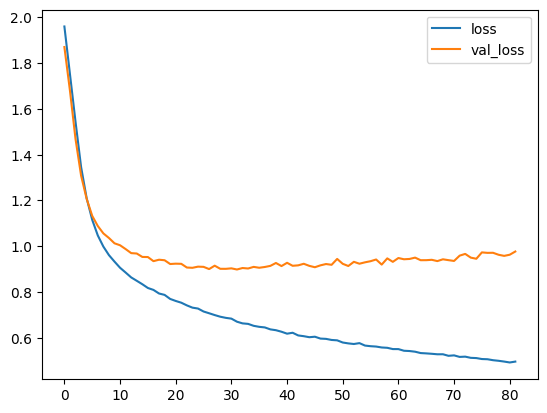

In [ ]:
losses=pd.DataFrame(history.history)
losses[['loss','val_loss']].plot()

In [ ]:
yhat=model.predict(X_test).argmax(axis=1)
print('Teste de acuracia: ',accuracy_score(y_test_xgb,yhat))
print('Confusion_matrix :\n',confusion_matrix(y_test_xgb,yhat),'\n')
print('Classification report:\n',metrics.classification_report(y_test_xgb, yhat))

14/14 [==============================] - 0s 2ms/step
Teste de acuracia:  0.6619047619047619
Confusion_matrix :
 [[43  7  1  4  8  7  0]
 [ 3 54  0  0  3  0  0]
 [ 0  0 64  0  0  1  0]
 [18  1  0 25  1 11  2]
 [ 5 14  0  5 22  9  1]
 [ 3  2  0  9  0 28 15]
 [ 0  0  0  4  0  8 42]] 

Classification report:
               precision    recall  f1-score   support

           0       0.60      0.61      0.61        70
           1       0.69      0.90      0.78        60
           2       0.98      0.98      0.98        65
           3       0.53      0.43      0.48        58
           4       0.65      0.39      0.49        56
           5       0.44      0.49      0.46        57
           6       0.70      0.78      0.74        54

    accuracy                           0.66       420
   macro avg       0.66      0.66      0.65       420
weighted avg       0.66      0.66      0.65       420



In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=X_train.shape[1],activation='relu',input_shape=[X_train.shape[1]]))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=32,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=32,activation='relu'))
model.add(tf.keras.layers.Dense(units=7,activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['sparse_categorical_accuracy'])
history=model.fit(X_train,y_train_xgb,batch_size=32,epochs=2000,validation_data=(X_test,y_test_xgb),callbacks=earlystop)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 15)                240       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                512       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 128)              

<Axes: >

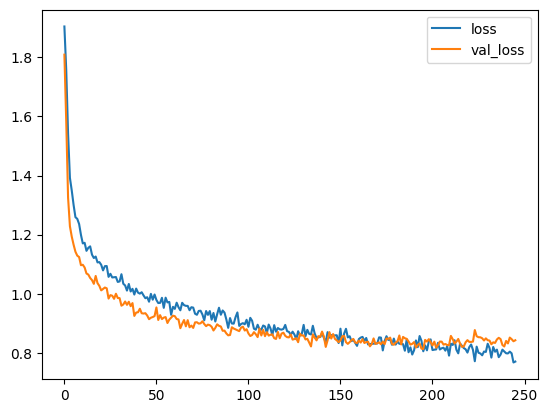

In [ ]:
losses=pd.DataFrame(history.history)
losses[['loss','val_loss']].plot()

In [ ]:
yhat=model.predict(X_test).argmax(axis=1)
print('Teste de acuracia: ',accuracy_score(y_test_xgb,yhat))
print('Confusion_matrix :\n',confusion_matrix(y_test_xgb,yhat),'\n')
print('Classification report:\n',metrics.classification_report(y_test_xgb, yhat))

14/14 [==============================] - 0s 2ms/step
Teste de acuracia:  0.7166666666666667
Confusion_matrix :
 [[45  5  0  2 11  7  0]
 [ 1 55  0  0  4  0  0]
 [ 0  0 64  0  0  1  0]
 [14  2  0 24  4 10  4]
 [ 5  8  0  4 31  7  1]
 [ 4  1  0  4  5 32 11]
 [ 0  0  0  0  0  4 50]] 

Classification report:
               precision    recall  f1-score   support

           0       0.65      0.64      0.65        70
           1       0.77      0.92      0.84        60
           2       1.00      0.98      0.99        65
           3       0.71      0.41      0.52        58
           4       0.56      0.55      0.56        56
           5       0.52      0.56      0.54        57
           6       0.76      0.93      0.83        54

    accuracy                           0.72       420
   macro avg       0.71      0.71      0.71       420
weighted avg       0.72      0.72      0.71       420

